In [ ]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [ ]:
np.set_printoptions(suppress = True)

In [ ]:
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

# **1. 데이터 불러오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 현재 데이터는 댐별로(지역별로) 구분하여 4개의 그룹으로 나눠져 있는 상태
  - group 1: 군위, 김천부항, 남강, 밀양, 보령, 보현산, 부안, 성덕, 영주, 장흥, 주암(조), 횡성
  - group 2 소양강, 충주
  - group 3: 섬진강, 용담, 임하, 주암(본), 합천
  - group 4: 대청, 안동

In [ ]:
# 파일 저장 경로 설정
save_path = '/content/drive/MyDrive/2023년 K-water 대국민 물 빅데이터 분석과제 공모전/final/data'

In [ ]:
# 데이터 파일 경로 저장
train_files = [os.path.join(save_path, f'train_group{i}.csv') for i in range(1, 5)]
test_files = [os.path.join(save_path, f'test_group{i}.csv') for i in range(1, 5)]

# 각 파일을 데이터프레임 형태로 불러오기
train_groups = [pd.read_csv(file) for file in train_files]
test_groups = [pd.read_csv(file) for file in test_files]

In [ ]:
train_groups[0].head(3)

rain_qy  inflow_qy  outflow_qy  reserve_qy  reserve_rt  tot_qy  valid_qy  \
0  0.000000   0.000000    0.732368    3.022033       0.401    48.7      40.1   
1  0.000000   0.094401    0.926241    3.418644       0.606    48.7      40.1   
2  2.847029   0.304539    0.569849    3.145358       0.456    48.7      40.1   

   unused_qy  maximum_use_qy  avg_hmd  ...  dam_nm_주암(조)  dam_nm_횡성  \
0        5.5            40.1    0.441  ...             0          0   
1        5.5            40.1    0.479  ...             0          0   
2        5.5            40.1    0.665  ...             0          0   

   year_2019  year_2020  year_2021  year_2022  season_autumn  season_spring  \
0          1          0          0          0              0              0   
1          0          1          0          0              1              0   
2          0          0          1          0              0              1   

   season_summer  season_winter  
0              1              0  
1              0              0  
2              0              0  

[3 rows x 33 columns]

In [ ]:
test_groups[0].head(3)

rain_qy  inflow_qy  outflow_qy  reserve_qy  reserve_rt  tot_qy  valid_qy  \
0  0.996838   0.189794    0.863312     27.9460       0.574    48.7      40.1   
1  0.000000   0.169743    0.832039     17.7640       0.365    48.7      40.1   
2  0.000000   0.000000    0.214305     14.6331       0.301    48.7      40.1   

   unused_qy  maximum_use_qy  avg_hmd  ...  dam_nm_주암(조)  dam_nm_횡성  \
0        5.5            40.1    0.761  ...             0          0   
1        5.5            40.1    0.650  ...             0          0   
2        5.5            40.1    0.744  ...             0          0   

   year_2019  year_2020  year_2021  year_2022  season_autumn  season_spring  \
0          0          0          1          0              0              0   
1          1          0          0          0              0              0   
2          0          0          0          1              1              0   

   season_summer  season_winter  
0              1              0  
1              1              0  
2              0              0  

[3 rows x 33 columns]

- 데이터가 제대로 불러와 진 것을 확인할 수 있다.

In [ ]:
train_groups[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13477 entries, 0 to 13476
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rain_qy         13477 non-null  float64
 1   inflow_qy       13477 non-null  float64
 2   outflow_qy      13477 non-null  float64
 3   reserve_qy      13477 non-null  float64
 4   reserve_rt      13477 non-null  float64
 5   tot_qy          13477 non-null  float64
 6   valid_qy        13477 non-null  float64
 7   unused_qy       13477 non-null  float64
 8   maximum_use_qy  13477 non-null  float64
 9   avg_hmd         13477 non-null  float64
 10  avg_tmr         13477 non-null  float64
 11  avg_wv          13477 non-null  float64
 12  sun_sum         13477 non-null  float64
 13  dam_nm_군위       13477 non-null  int64  
 14  dam_nm_김천부항     13477 non-null  int64  
 15  dam_nm_남강       13477 non-null  int64  
 16  dam_nm_밀양       13477 non-null  int64  
 17  dam_nm_보령       13477 non-null 

### **✅ Data Description**
1. rain_qy: 강우량
2. inflow_qy: (물의) 유입량
3. outflow_qy: (물의) 방류량
4. reserve_qy: (현재) 저수량 (**target** 변수)
5. reserve_rt: 저수율(저수량 / 총저수량)
6. tot_qy: 총저수량
7. valid_qy: 유효저수량
8. unused_qy: 비활용용량
9. maximum_use_qy: (최대) 이수용량
10. avg_hmd: 평균습도
11. avg_tmr: 평균온도
12. avg_wv: 평균풍속
13. sun_sum: 합계일사량
14. dam_nm_OO: 댐이름(범주형 변수)
15. year_OO: 연도(범주형 변수)
16. season_OO: 계절(범주형 변수)

# **2. 평가 지표**
**1) RMSE(Rooted Mean Square Error)**  
- 회귀 모델의 성능을 평가하는 지표 중 하나로, 예측된 값과 실제 값 사이의 오차를 측정
  - 오차를 제곱하여 평균을 구한 뒤 다시 제곱근을 취한 값으로 계산
- 수식  
  $RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2}$  
  - N: 총 데이터 포인트의 개수
  - y_i: 실제 값(observed)
  - y_hat: 예측된 값(fitted)
- 예측 오차가 클수록 더 큰 패널티를 받음
  - RMSE가 작을수록 모델의 예측이 더 정확하다고 판단할 수 있음


**2) Adjusted R-Sqaure(수정 결정계수)**    
- R-Square(결정계수)
  - 모형의 설명력을 의미
  - 회귀식을 통해 얻어진 예측값(fitted)이 실제 y값(observed)을 얼마나 잘 설명하는지를 의미
- 결정계수는 독립변수의 유의성과 무관하게 독립변수의 개수에 비례하여 높아진다는 단점이 존재
  - 이러한 결정계수의 단점을 보완하기 위해 수정 결정 계수 활용
  - 실제로 유의미한 예측 변수가 모델에 포함되었을 때만 R-squared가 증가하도록 합
  - 보통 결정계수에 비해 조금 더 작은 값으로 산출됨
  - 수식  
  $Adjusted\ R^2 = 1 - \frac{(1 - R^2) \times (n - 1)}{(n - k - 1)}$  
    - n: 총 데이터 포인트의 개수
    - k: 모델에 포함된 독립 변수의 개수
    - R^2: R-Square 값



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# **3. 모델별 성능 확인을 위한 함수**

In [ ]:
colors = [
    'khaki', 'teal', 'orchid', 'sandybrown', 'greenyellow', 'dodgerblue', 'rosybrown',
    'deeppink', 'salmon', 'olivedrab', 'olive', 'forestgreen',
    'royalblue', 'mediumpurple', 'gold', 'seagreen',
    'turquoise', 'steelblue', 'slategray', 'peru', 'slateblue', 'cadetblue',
    'lime', 'lavender', 'lightcoral', 'lightseagreen', 'lightskyblue', 'lightgreen',
    'lightpink', 'lightsalmon', 'lightsteelblue', 'lightyellow', 'palegreen',
]

In [ ]:
## 회귀곡선 시각화
# 예측값, 실제값을 산점도로 표현

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(10, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='b')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

In [ ]:
# 평가 지표 시각화

def model_eval(name_, pred, actual):
    global my_predictions
    global colors

    plot_predictions(name_, pred, actual)

    rmse = np.sqrt(mean_squared_error(pred, actual))

    n = len(actual)  # 데이터 개수
    p = X_train.shape[1]  # 변수의 개수
    r2 = r2_score(actual, pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    my_predictions[name_] = {'rmse': rmse, 'Adjusted R_2': adjusted_r2}

    # 데이터프레임 생성
    df = pd.DataFrame(my_predictions).T
    df['model'] = df.index
    df = df.sort_values(by=['rmse', 'Adjusted R_2'], ascending=[True, False])

    # 상한, 하한 설정
    min_ = df['rmse'].min() - 10
    max_ = df['rmse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['rmse'])

    for i, v in enumerate(df['rmse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('RMSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

    print()
    print(df)

In [ ]:
# 모델의 중요도 상위 10개의 피처명과 그때의 중요도 값을 Series로 반환

def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
    ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]
    return ftr_top10

def visualize_ftr_importances(model):
    fig, ax = plt.subplots(figsize=(7, 5))
    fig.tight_layout()

    ftr_top10 = get_top_features(model)
    ax.set_title(model.__class__.__name__ + ' Feature Importances', size=15)

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(12)

    sns.barplot(x=ftr_top10.values, y=ftr_top10.index, ax=ax)

# **4. 모델링**

## **🌊 Group 1**

In [ ]:
group1_tr = train_groups[0]
group1_te = test_groups[0]

In [ ]:
group1_tr.describe()

rain_qy     inflow_qy    outflow_qy    reserve_qy    reserve_rt  \
count  13477.000000  13477.000000  13477.000000  13477.000000  13477.000000   
mean       0.454480      0.986612      1.293672      3.805259      0.559749   
std        0.990088      1.110773      0.956516      0.935363      0.181338   
min        0.000000      0.000000      0.000000      0.002996      0.000000   
25%        0.000000      0.151862      0.570980      3.257366      0.436000   
50%        0.000000      0.563608      1.004668      3.827711      0.563000   
75%        0.139327      1.520169      1.603822      4.485810      0.706000   
max        5.478265      8.506904      8.522900      5.521001      0.984000   

             tot_qy      valid_qy     unused_qy  maximum_use_qy      avg_hmd  \
count  13477.000000  13477.000000  13477.000000    13477.000000  13477.00000   
mean     117.474294    104.310780      7.821006      102.281490      0.68562   
std       89.819547     84.343982      5.208418       83.224086      0.14882   
min       22.110000     17.880000      0.800000       17.820000      0.19800   
25%       50.300000     40.100000      3.700000       35.600000      0.58500   
50%       73.600000     69.800000      5.900000       69.800000      0.70400   
75%      181.100000    160.400000     12.000000      160.400000      0.79700   
max      309.200000    299.700000     20.000000      299.700000      1.00000   

       ...  dam_nm_주암(조)     dam_nm_횡성     year_2019     year_2020  \
count  ...  13477.000000  13477.000000  13477.000000  13477.000000   
mean   ...      0.083401      0.083550      0.242710      0.254359   
std    ...      0.276498      0.276722      0.428737      0.435517   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      1.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

          year_2021     year_2022  season_autumn  season_spring  \
count  13477.000000  13477.000000   13477.000000   13477.000000   
mean       0.253172      0.249759       0.250946       0.249907   
std        0.434845      0.432889       0.433574       0.432975   
min        0.000000      0.000000       0.000000       0.000000   
25%        0.000000      0.000000       0.000000       0.000000   
50%        0.000000      0.000000       0.000000       0.000000   
75%        1.000000      0.000000       1.000000       0.000000   
max        1.000000      1.000000       1.000000       1.000000   

       season_summer  season_winter  
count   13477.000000   13477.000000  
mean        0.250056       0.249091  
std         0.433061       0.432503  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       0.000000  
max         1.000000       1.000000  

[8 rows x 33 columns]

### **1) 랜덤 포레스트(RandomForestRegressor)**








#### **a. Base Model**

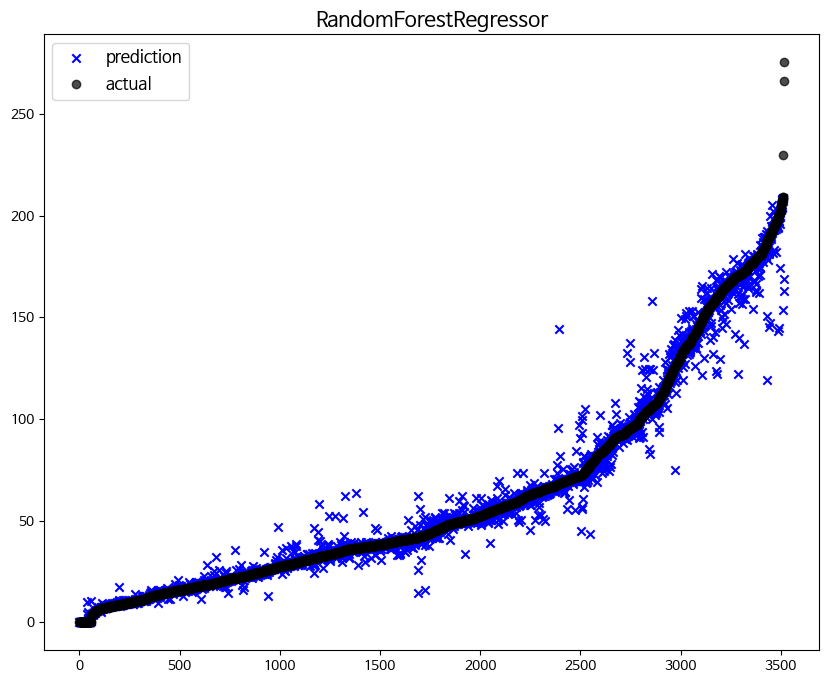

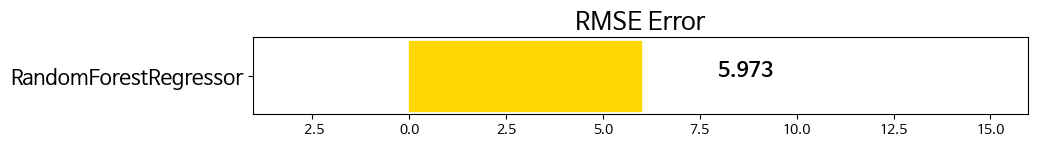


                       Adjusted R_2      rmse                  model
RandomForestRegressor      0.986699  5.972727  RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 기본 모델 생성
rf_base1 = RandomForestRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# 모델 학습
rf_base1.fit(X_train, y_train)

# 모델 예측
rf_pred1 = rf_base1.predict(X_test)

# 로그 스케일로 예측된 예측값을 원복
original_rf_pred1 = np.expm1(rf_pred1)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor', original_rf_pred1, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 150, 200],  # 트리 개수
    'max_depth': [None, 10, 20],     # 최대 깊이(None은 제한 없음을 의미)
    'min_samples_split': [2, 3, 4], # 노드 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 3],   # 리프 노드를 위한 최소 샘플 수
    'max_features': [None, 1, 2] # 트리 분할 시 사용할 최대 특성의 수
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(rmse, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

rf_base = RandomForestRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
rf_grid_search = GridSearchCV(rf_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
rf_grid_search.fit(X_train, y_train)

# 최적 모델 저장
rf_best_model1 = rf_grid_search.best_estimator_

print("최적 파라미터 조합:", rf_grid_search.best_params_)

최적 파라미터 조합: {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


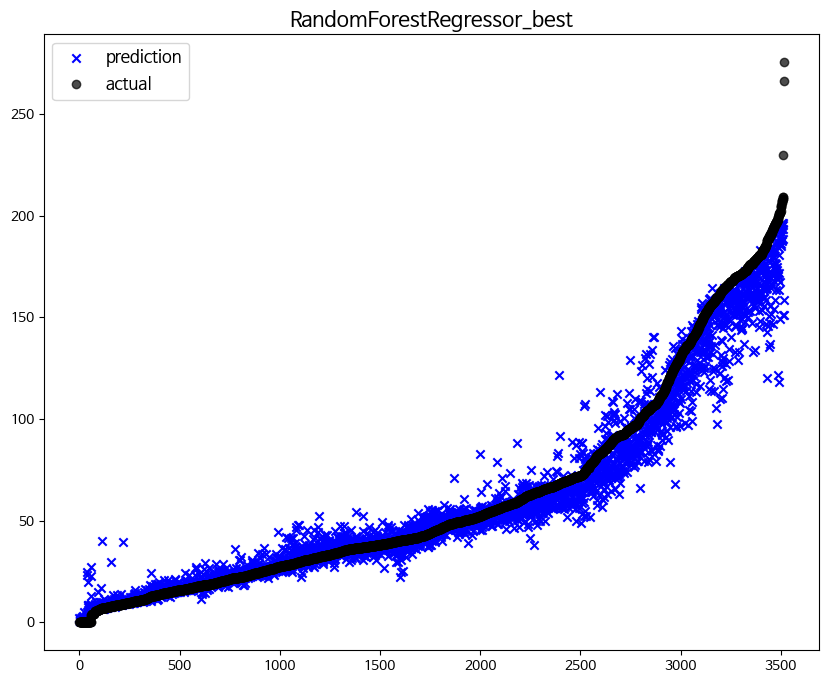

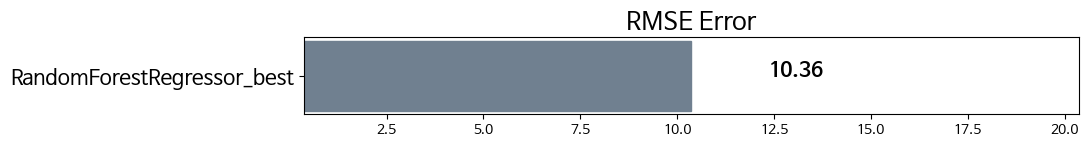


                            Adjusted R_2       rmse  \
RandomForestRegressor_best      0.959982  10.359905   

                                                 model  
RandomForestRegressor_best  RandomForestRegressor_best  


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# 모델 학습
rf_best_model1.fit(X_train, y_train)

# 모델 예측
rf_pred1 = rf_best_model1.predict(X_test)

# 로그 변환된 y값을 원상 복구
original_rf_pred1 = np.expm1(rf_pred1)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor_best', original_rf_pred1, y_test)

- 하이퍼 파라미터 튜닝을 진행하지 않은 **base model**의 성능이 더 좋다.

### **2) CatBoostRegressor**

In [ ]:
# !pip install catboost

#### **a. Base Model**

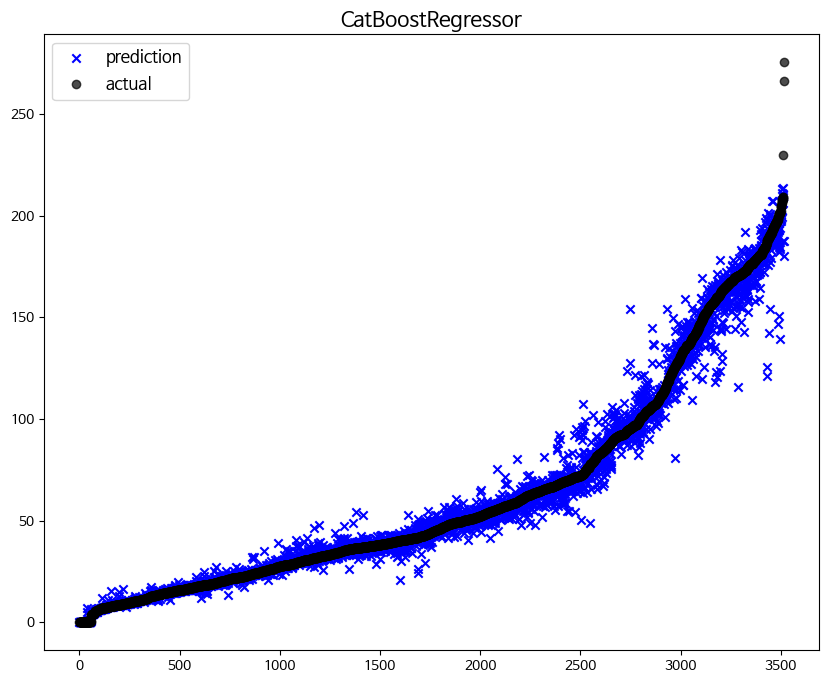

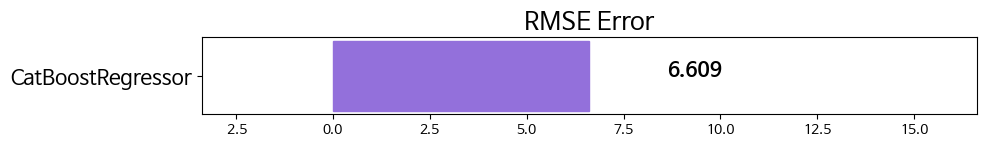


                   Adjusted R_2     rmse              model
CatBoostRegressor      0.983712  6.60946  CatBoostRegressor


In [ ]:
from catboost import CatBoostRegressor

# 기본 모델 생성
catboost_base1 = CatBoostRegressor(random_seed = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# 모델 학습
catboost_base1.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred1 = catboost_base1.predict(X_test)

# 로그 변환된 y값을 원상 복구
original_catboost_pred1 = np.expm1(catboost_pred1)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor', original_catboost_pred1, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼파라미터 그리드 설정
param_grid = {
    'border_count': [200, 254, 300],  # 결정 경계(borders)의 수, 트리 노드 분할에 사용
    'depth': [4, 6, 8],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.5],  # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'iterations': [500, 1000],  # 반복 횟수, 학습 과정에서 사용되는 트리의 수
    'l2_leaf_reg': [1, 3, 5],  # L2 정규화의 강도, 모델의 과적합을 제어
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(rmse, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

catboost_base = CatBoostRegressor(random_seed = 42)

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
catboost_grid_search = GridSearchCV(catboost_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
catboost_grid_search.fit(X_train, y_train, verbose = 0)

# 최적 모델 저장
catboost_best_model1 = catboost_grid_search.best_estimator_

print("최적 파라미터 조합:", catboost_grid_search.best_params_)

최적 파라미터 조합: {'border_count': 254, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


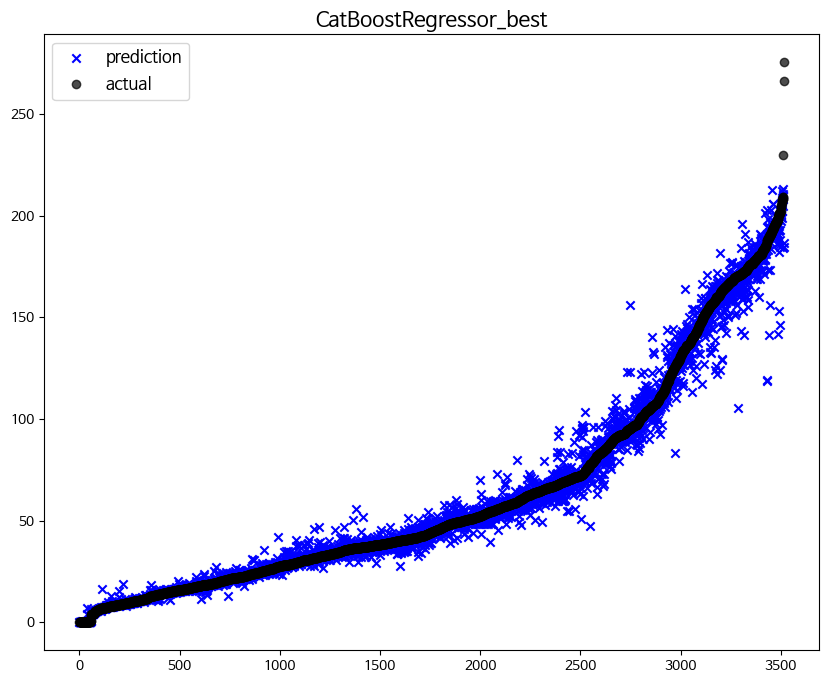

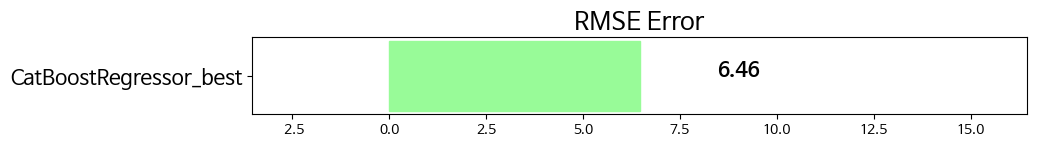


                        Adjusted R_2      rmse                   model
CatBoostRegressor_best       0.98444  6.460084  CatBoostRegressor_best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# 모델 학습
catboost_best_model1.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred1 = catboost_best_model1.predict(X_test)

# 로그 변환된 y값을 원상 복구
original_catboost_pred1 = np.expm1(catboost_pred1)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor_best', original_catboost_pred1, y_test)

### **3) XGBRegressor**

#### **a. Base Model**

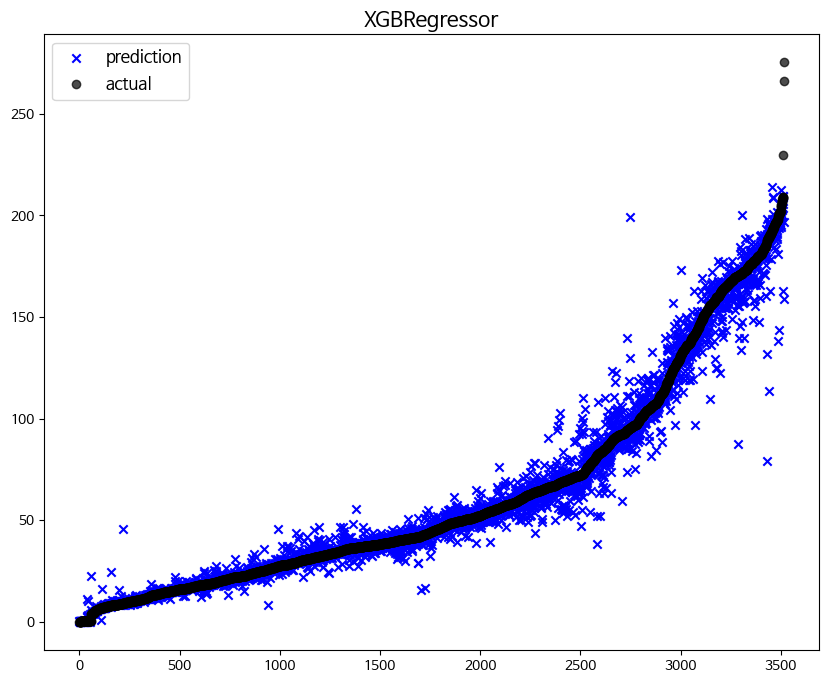

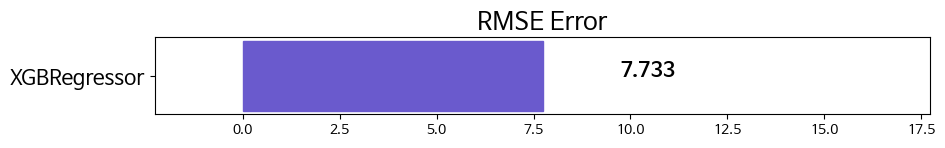


              Adjusted R_2      rmse         model
XGBRegressor      0.977706  7.732623  XGBRegressor


In [ ]:
from xgboost import XGBRegressor

# 기본 모델 생성
xgb_base1 = XGBRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# 모델 학습
xgb_base1.fit(X_train, y_train, verbose=0)

# 모델 예측
xgb_pred1 = xgb_base1.predict(X_test)

# 로그 변환된 y값을 원상 복구
original_xgb_pred1 = np.expm1(xgb_pred1)

# 모델 평가 및 시각화
model_eval('XGBRegressor', original_xgb_pred1, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 튜닝을 위한 매개 변수 Grid 정의
param_grid = {
    'n_estimators': [100, 300, 500], # 트리의 수, 반복 횟수
    'learning_rate': [0.01, 0.1, 0.3], # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'max_depth': [3, 5, 7], # 트리의 최대 깊이
    'min_child_weight': [1, 3, 5] # 트리의 각 리프 노드에서 최소한으로 필요한 관측치의 수
}

def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(rmse, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

xgb_base = XGBRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
xgb_grid_search = GridSearchCV(xgb_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
xgb_grid_search.fit(X_train, y_train)

# 최적 모델 저장
xgb_best_model1 = xgb_grid_search.best_estimator_

print("최적 파라미터 조합:", xgb_grid_search.best_params_)

최적 파라미터 조합: {'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}


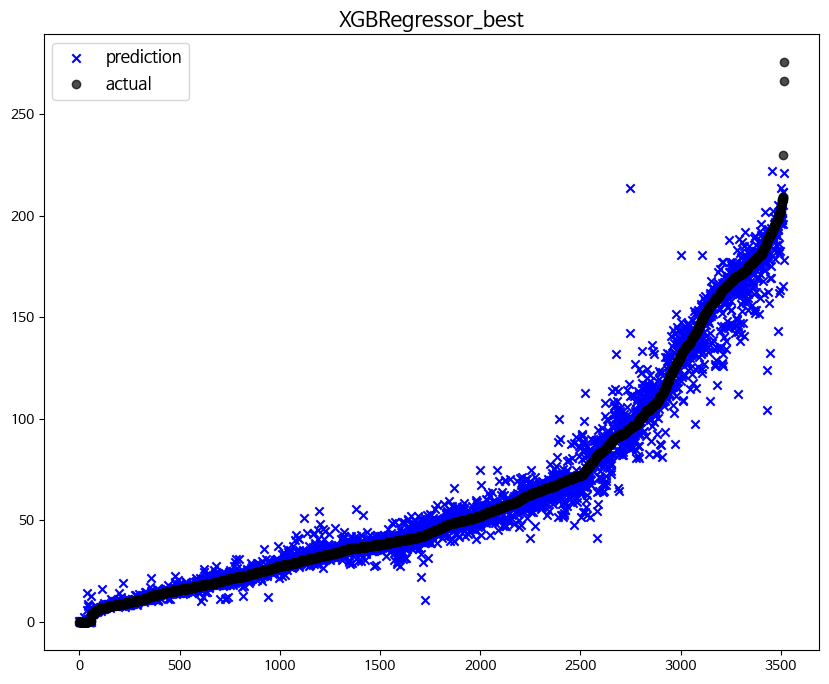

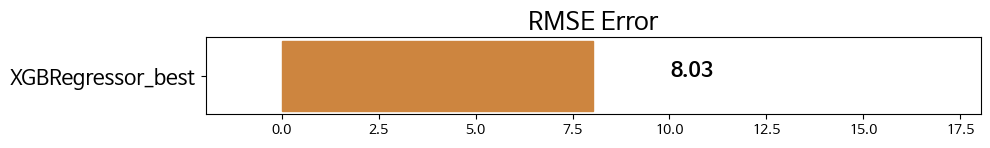


                   Adjusted R_2      rmse              model
XGBRegressor_best       0.97596  8.029659  XGBRegressor_best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# 모델 학습
xgb_best_model1.fit(X_train, y_train, verbose = 0)

# 모델 예측
xgb_pred1 = xgb_best_model1.predict(X_test)

# 로그 변환된 y값을 원상 복구
original_xgb_pred1 = np.expm1(xgb_pred1)

# 모델 평가 및 시각화
model_eval('XGBRegressor_best', original_xgb_pred1, y_test)

- 하이퍼 파라미터 튜닝을 진행하지 않은 **base model**의 성능이 더 좋다.

### **4) ExtraTreesRegressor**

#### **a. Base Model**

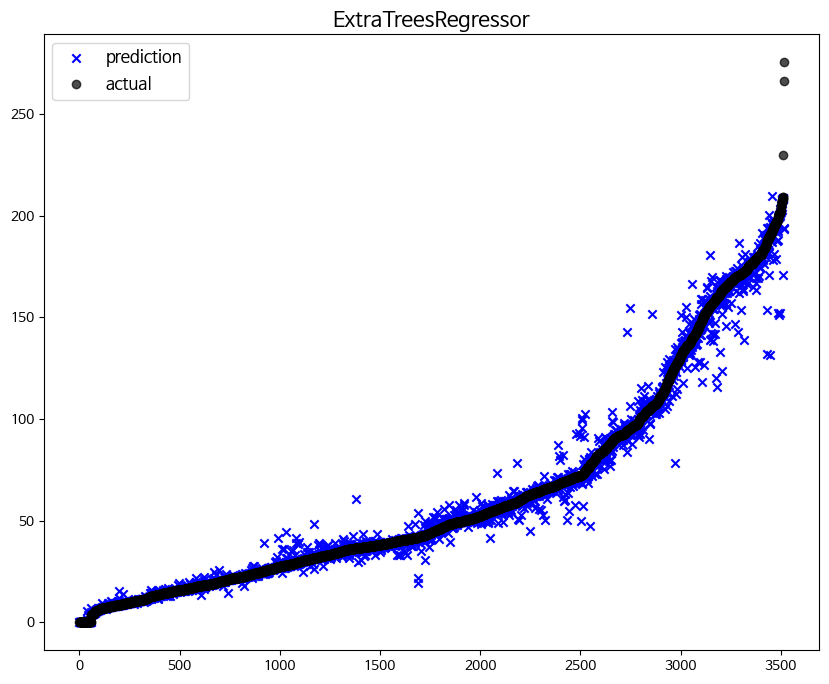

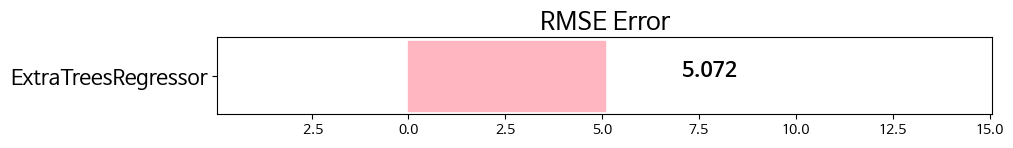


                     Adjusted R_2      rmse                model
ExtraTreesRegressor       0.99041  5.071595  ExtraTreesRegressor


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# 기본 모델 생성
et_base1 = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

my_predictions = {} # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# 모델 학습
et_base1.fit(X_train, y_train)

# 모델 예측
et_pred1 = et_base1.predict(X_test)

# 로그 변환된 y값을 원상 복구
original_et_pred1 = np.expm1(et_pred1)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor', original_et_pred1, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],   # 트리의 수, 반복 횟수
    'max_depth': [None, 10, 20],    # 트리의 최대 깊이
    'min_samples_split': [2, 3, 4], # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드에 필요한 최소 샘플 수
    'max_features': ['sqrt', 'log2', 1] # 노드에서 고려할 최대 피처 수
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(rmse, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

et_base = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
et_grid_search = GridSearchCV(et_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
et_grid_search.fit(X_train, y_train)

# 최적 모델 저장
et_best_model1 = et_grid_search.best_estimator_

print("최적 파라미터 조합:", et_grid_search.best_params_)

최적 파라미터 조합: {'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


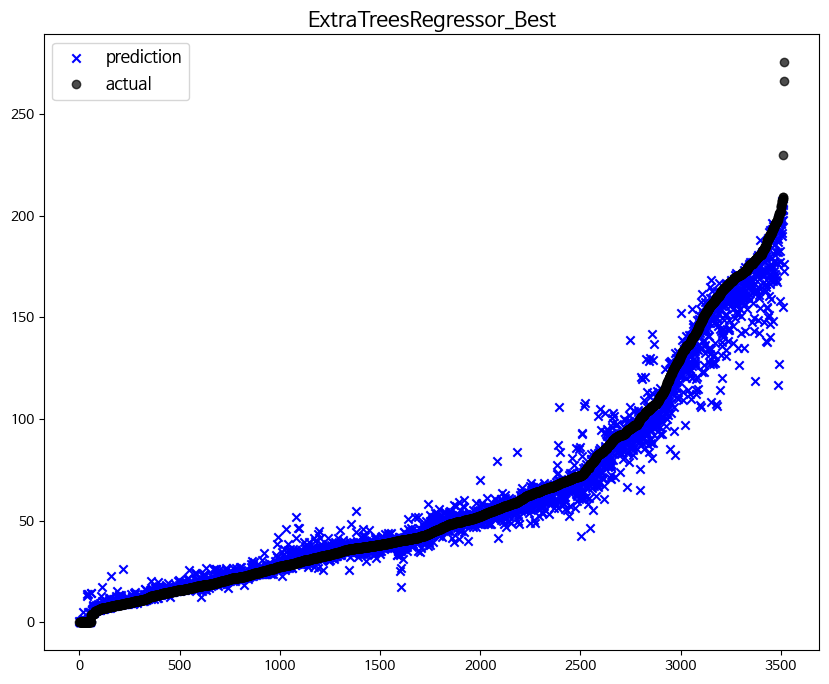

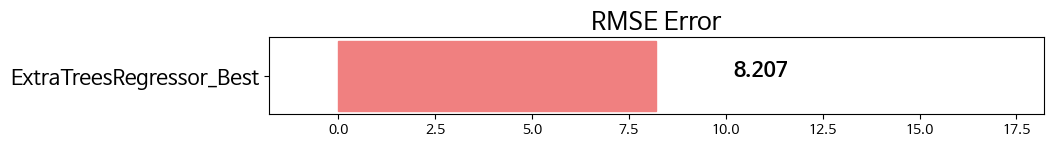


                          Adjusted R_2      rmse                     model
ExtraTreesRegressor_Best      0.974884  8.207344  ExtraTreesRegressor_Best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis = 1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis = 1)
y_test = group1_te['reserve_qy']

# 모델 학습
et_best_model1.fit(X_train, y_train)

# 모델 예측
et_pred1 = et_best_model1.predict(X_test)

# 로그 변환된 y값을 원상 복구
original_et_pred1 = np.expm1(et_pred1)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor_Best', original_et_pred1, y_test)

- 하이퍼 파라미터 튜닝을 진행하지 않은 **base model**의 성능이 더 좋다.

### **5) LGBMRegressor**

#### **a. Base Model**

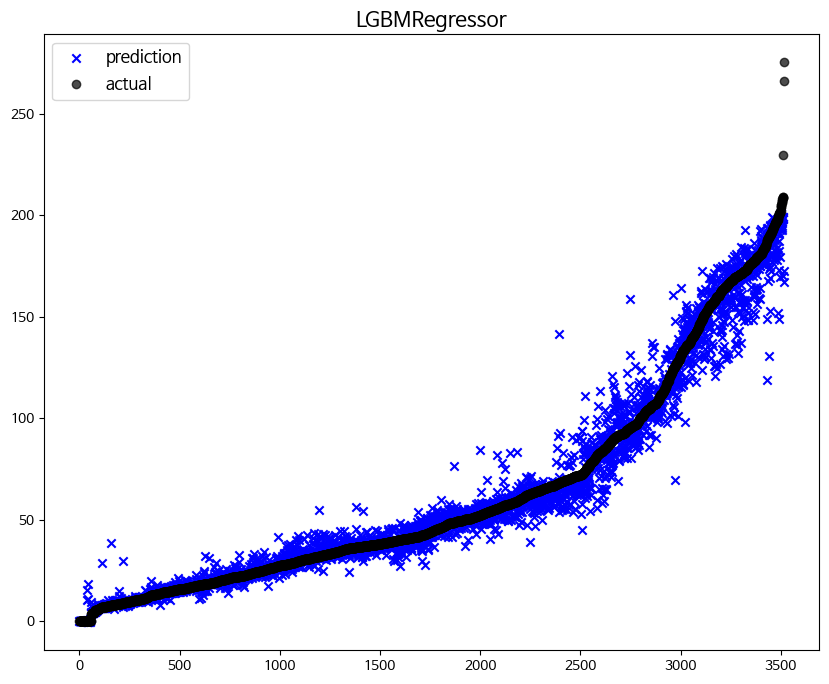

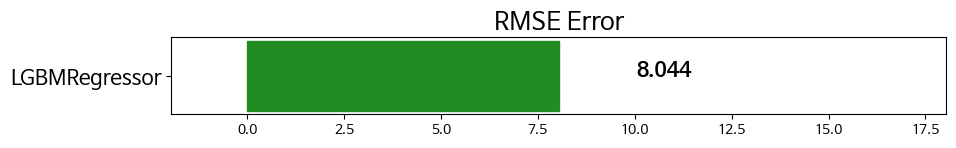


               Adjusted R_2      rmse          model
LGBMRegressor      0.975876  8.043734  LGBMRegressor


In [ ]:
from lightgbm import LGBMRegressor

# 기본 모델 생성
lgbm_base1 = LGBMRegressor(random_state = 42, verbosity=-1)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# 모델 학습
lgbm_base1.fit(X_train, y_train)

# 모델 예측
lgbm_pred1 = lgbm_base1.predict(X_test)

# 로그 변환된 y값을 원상 복구
original_lgbm_pred1 = np.expm1(lgbm_pred1)

# 모델 평가 및 시각화
model_eval('LGBMRegressor', original_lgbm_pred1, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [100, 300, 500],  # 트리의 개수
    'learning_rate': [0.01, 0.1, 0.3],  # 학습률
    'max_depth': [None, 5, 7],  # 트리의 최대 깊이
    'min_child_samples': [20, 50, 100],  # 각 리프 노드에 필요한 최소 샘플 수
    'subsample': [0.8, 1.0],  # 각 트리에 사용될 데이터 샘플링 비율
    'colsample_bytree': [0.8, 1.0],  # 각 트리에 사용될 피처 샘플링 비율
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(rmse, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

lgbm_base = LGBMRegressor(random_state = 42, verbosity=-1)

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
lgbm_grid_search = GridSearchCV(lgbm_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
lgbm_grid_search.fit(X_train, y_train)

# 최적 모델 저장
lgbm_best_model1 = lgbm_grid_search.best_estimator_

print("최적 파라미터 조합:", lgbm_grid_search.best_params_)

최적 파라미터 조합: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': None, 'min_child_samples': 20, 'n_estimators': 500, 'subsample': 0.8}


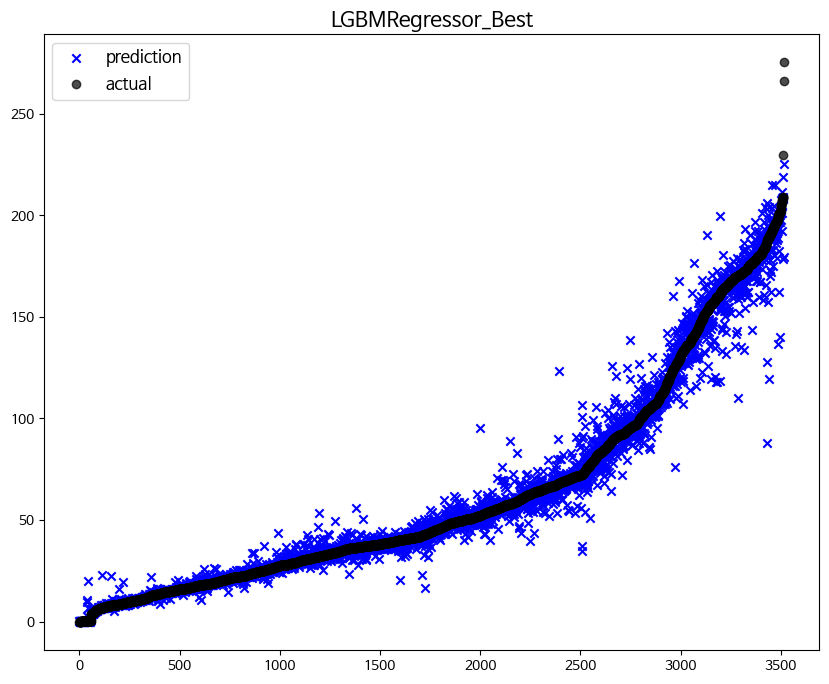

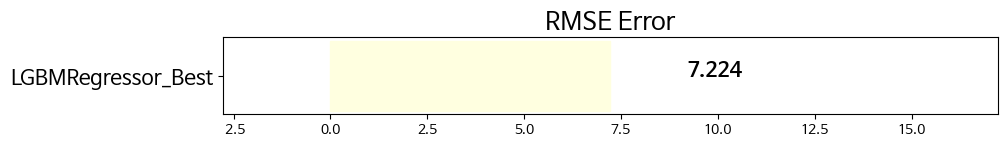


                    Adjusted R_2      rmse               model
LGBMRegressor_Best      0.980543  7.223868  LGBMRegressor_Best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

# 모델 학습
lgbm_best_model1.fit(X_train, y_train)

# 모델 예측
lgbm_pred1 = lgbm_best_model1.predict(X_test)

# 로그 변환된 y값을 원상 복구
original_lgbm_pred1 = np.expm1(lgbm_pred1)

# 모델 평가 및 시각화
model_eval('LGBMRegressor_Best', original_lgbm_pred1, y_test)

### **⏺ 최적 모델로 예측**

- 모델별 성능 비교

|Model|RMSE|Adj R^2|
|-------|----|----|
|RandomForestRegressor|5.973|0.9867|
|CatBoostRegressor|6.460|0.9844|
|XGBRegressor|7.733|0.9770|
|ExtraTreesRegressor|5.072|0.9904|
|LGBMRegressor|7.224|0.9805|

- rmse와 Adjusted R-Square 측면에서 모두 ExtraTreesRegressor의 성능이 가장 좋음을 확인할 수 있다.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# feature, target 분리
X_train = group1_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group1_tr['reserve_qy']

X_test = group1_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group1_te['reserve_qy']

best_model1 = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

# 모델 학습
best_model1.fit(X_train, y_train)

# 모델 예측
y_pred1 = best_model1.predict(X_test)

# 로그 변환된 y값을 원상 복구
original_y_pred1 = np.expm1(y_pred1)

In [ ]:
# 예측 성능 확인

rmse1 = np.sqrt(mean_squared_error(y_test, original_y_pred1))
print(f"Group 1 RMSE: {rmse1:.3f}")

Group 1 RMSE: 5.072


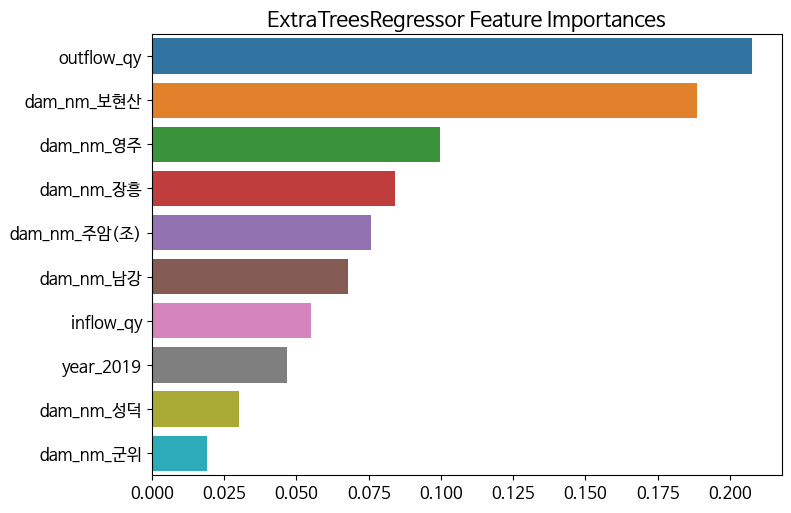

In [ ]:
# 피처 중요도 시각화

visualize_ftr_importances(best_model1)
plt.show()

In [ ]:
# 역변환을 위한 함수

def reverse_one_hot_encoding(row, prefix):
  cols = [col for col in row.index if col.startswith(prefix)] # 범주형 변수
  value = [col.split('_')[-1] for col in cols if row[col] == 1] # 카테고리

  return value[0] if value else None

In [ ]:
# 범주형 변수를 원래대로

X_test['dam_nm'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('dam_nm_',))
X_test['year'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('year',))
X_test['season'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('season',))

### **⏺ 활용 능력 계산**
- 현재 댐에 저장되어 있는 물 중 얼만큼을 사용할 수 있을까?

In [ ]:
# 현재 저수량 예측값을 DataFrame 형태로 저장

df1 = pd.DataFrame(original_y_pred1, columns = ['reserve_qy_pred'])
df1.head(3)

reserve_qy_pred
0        26.463792
1        18.438003
2        14.689891

In [ ]:
# 필요한 변수와 결합

df1 = pd.concat([X_test[['dam_nm', 'year', 'season']], df1, group1_te[['unused_qy', 'maximum_use_qy']]], axis = 1) # 열 방향 결합
df1.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy
0     군위  2021  summer        26.463792        5.5            40.1
1     군위  2019  summer        18.438003        5.5            40.1
2     군위  2022  autumn        14.689891        5.5            40.1

In [ ]:
# 활용 가능 용량 계산
def calculate_usable_qy(data):
    usable_qy = data['reserve_qy_pred'] - data['unused_qy']
    return min(usable_qy, data['maximum_use_qy']) # (최대) 이수용량을 초과하여 댐의 물을 이용할 수는 없음(관련 기관의 승인 필요)

df1['usable_qy'] = df1.apply(calculate_usable_qy, axis = 1)

In [ ]:
df1.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy  usable_qy
0     군위  2021  summer        26.463792        5.5            40.1  20.963792
1     군위  2019  summer        18.438003        5.5            40.1  12.938003
2     군위  2022  autumn        14.689891        5.5            40.1   9.189891

In [ ]:
# 활용 능력 계산
# (최대) 이수용량과 비교하였을 때 얼만큼의 물을 활용할 수 있는가

df1['efficiency'] = df1['usable_qy'] / df1['maximum_use_qy']
df1.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy  usable_qy  \
0     군위  2021  summer        26.463792        5.5            40.1  20.963792   
1     군위  2019  summer        18.438003        5.5            40.1  12.938003   
2     군위  2022  autumn        14.689891        5.5            40.1   9.189891   

   efficiency  
0    0.522788  
1    0.322643  
2    0.229174

In [ ]:
df1.groupby('dam_nm')['efficiency'].describe()

count      mean       std       min       25%       50%       75%  \
dam_nm                                                                      
군위      293.0  0.446600  0.162053  0.114030  0.348418  0.451895  0.544625   
김천부항    293.0  0.621367  0.188613  0.228754  0.481393  0.609845  0.797527   
남강      293.0  0.488868  0.144753  0.234640  0.408114  0.497194  0.533953   
밀양      293.0  0.713203  0.124895  0.386239  0.650700  0.717727  0.803618   
보령      293.0  0.376890  0.132206  0.163893  0.269402  0.361081  0.455011   
보현산     293.0  0.486918  0.178103  0.170089  0.368921  0.459664  0.571731   
부안      293.0  0.849538  0.102650  0.523864  0.776342  0.874833  0.916899   
성덕      293.0  0.608901  0.129304  0.320388  0.535373  0.606758  0.706629   
영주      293.0  0.314104  0.242302 -0.054840  0.153350  0.353009  0.505062   
장흥      293.0  0.582080  0.131440  0.339627  0.474876  0.552353  0.690349   
주암(조)   293.0  0.653650  0.198795  0.141445  0.596745  0.715983  0.792486   
횡성      293.0  0.621512  0.133885  0.203489  0.542371  0.636613  0.740392   

             max  
dam_nm            
군위      0.938685  
김천부항    1.000000  
남강      1.000000  
밀양      0.977815  
보령      0.711051  
보현산     1.000000  
부안      1.000000  
성덕      0.917133  
영주      0.860550  
장흥      0.916459  
주암(조)   0.897999  
횡성      0.800374

**❓ 활용능력이 음수인 경우**
- (현재) 저수량이 비활용용량보다 적으면(= 수위가 저수위보다 낮은 경우) 활용 가능 용량이 음수이기에 활용 능력 또한 음수로 계산된다.
  - 이러한 경우 관련 기관 승인 하에만 이수 가능
> 해당 경우 활용 능력을 0으로 산정

In [ ]:
## 활용 능력이 0 이하인 지역
# 활용 능력을 0으로 산정

df1.loc[df1['efficiency'] <= 0,'efficiency'] = 0

In [ ]:
df1.groupby('dam_nm')['efficiency'].describe()

count      mean       std       min       25%       50%       75%  \
dam_nm                                                                      
군위      293.0  0.446600  0.162053  0.114030  0.348418  0.451895  0.544625   
김천부항    293.0  0.621367  0.188613  0.228754  0.481393  0.609845  0.797527   
남강      293.0  0.488868  0.144753  0.234640  0.408114  0.497194  0.533953   
밀양      293.0  0.713203  0.124895  0.386239  0.650700  0.717727  0.803618   
보령      293.0  0.376890  0.132206  0.163893  0.269402  0.361081  0.455011   
보현산     293.0  0.486918  0.178103  0.170089  0.368921  0.459664  0.571731   
부안      293.0  0.849538  0.102650  0.523864  0.776342  0.874833  0.916899   
성덕      293.0  0.608901  0.129304  0.320388  0.535373  0.606758  0.706629   
영주      293.0  0.324815  0.226442  0.000000  0.153350  0.353009  0.505062   
장흥      293.0  0.582080  0.131440  0.339627  0.474876  0.552353  0.690349   
주암(조)   293.0  0.653650  0.198795  0.141445  0.596745  0.715983  0.792486   
횡성      293.0  0.621512  0.133885  0.203489  0.542371  0.636613  0.740392   

             max  
dam_nm            
군위      0.938685  
김천부항    1.000000  
남강      1.000000  
밀양      0.977815  
보령      0.711051  
보현산     1.000000  
부안      1.000000  
성덕      0.917133  
영주      0.860550  
장흥      0.916459  
주암(조)   0.897999  
횡성      0.800374

## **🌊 Group 2**

In [ ]:
group2_tr = train_groups[1]
group2_te = test_groups[1]

In [ ]:
group2_tr.describe()

rain_qy    inflow_qy   outflow_qy   reserve_qy   reserve_rt  \
count  2241.000000  2241.000000  2241.000000  2241.000000  2241.000000   
mean      0.529582     3.617504     4.232899  1616.782075     0.571687   
std       0.999326     1.309580     0.774461   278.913606     0.095313   
min       0.000000     0.000000     2.498152   848.952100     0.308700   
25%       0.000000     2.820843     3.835854  1460.897600     0.516000   
50%       0.000000     3.561529     4.262793  1639.560000     0.575000   
75%       0.531980     4.370662     4.457111  1811.398400     0.638000   
max       4.921199     8.380398     8.284316  2416.721000     0.833000   

            tot_qy     valid_qy    unused_qy  maximum_use_qy      avg_hmd  \
count  2241.000000  2241.000000  2241.000000     2241.000000  2241.000000   
mean   2824.765730  1844.326640   622.915663     1830.548416     0.688340   
std      75.016373    55.512116    27.005894       78.812223     0.133449   
min    2750.000000  1789.000000   596.000000     1538.000000     0.316000   
25%    2750.000000  1789.000000   596.000000     1789.000000     0.589000   
50%    2750.000000  1789.000000   596.000000     1789.000000     0.703000   
75%    2900.000000  1900.000000   650.000000     1900.000000     0.788000   
max    2900.000000  1900.000000   650.000000     1900.000000     1.000000   

       ...   dam_nm_소양강    dam_nm_충주    year_2019    year_2020    year_2021  \
count  ...  2241.000000  2241.000000  2241.000000  2241.000000  2241.000000   
mean   ...     0.498438     0.501562     0.239179     0.257474     0.251673   
std    ...     0.500109     0.500109     0.426677     0.437340     0.434071   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
50%    ...     0.000000     1.000000     0.000000     0.000000     0.000000   
75%    ...     1.000000     1.000000     0.000000     1.000000     1.000000   
max    ...     1.000000     1.000000     1.000000     1.000000     1.000000   

         year_2022  season_autumn  season_spring  season_summer  season_winter  
count  2241.000000    2241.000000    2241.000000    2241.000000    2241.000000  
mean      0.251673       0.253012       0.247657       0.251227       0.248104  
std       0.434071       0.434835       0.431748       0.433816       0.432009  
min       0.000000       0.000000       0.000000       0.000000       0.000000  
25%       0.000000       0.000000       0.000000       0.000000       0.000000  
50%       0.000000       0.000000       0.000000       0.000000       0.000000  
75%       1.000000       1.000000       0.000000       1.000000       0.000000  
max       1.000000       1.000000       1.000000       1.000000       1.000000  

[8 rows x 23 columns]

### **1) 랜덤 포레스트(RandomForestRegressor)**

#### **a. Base Model**

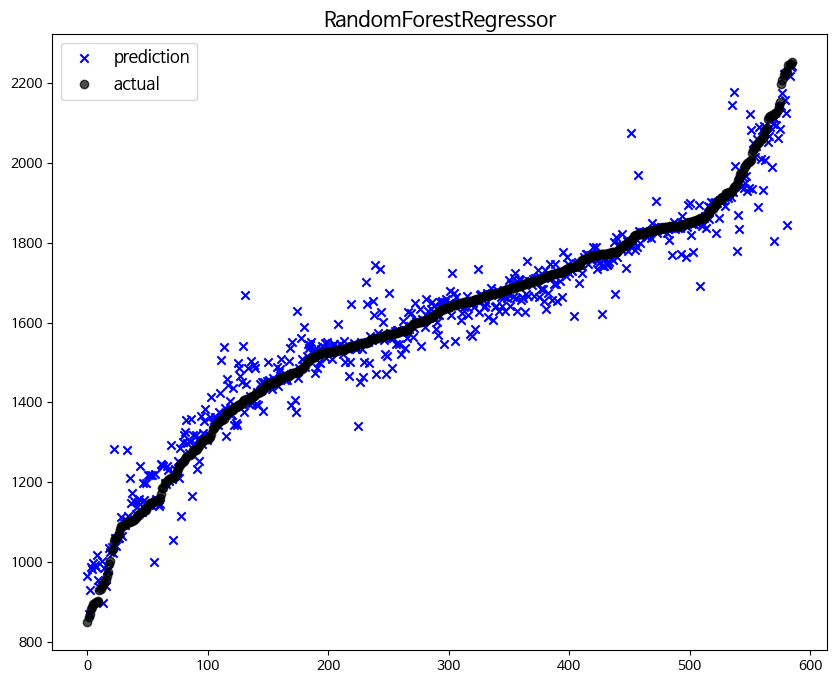

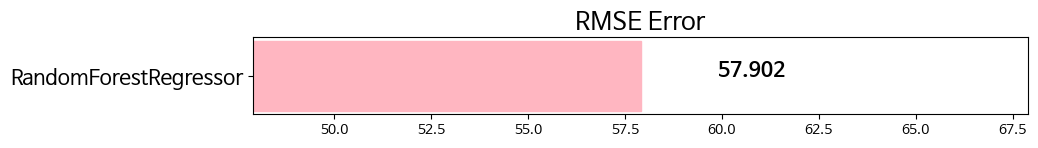


                       Adjusted R_2       rmse                  model
RandomForestRegressor      0.957065  57.902202  RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 기본 모델 생성
rf_base2 = RandomForestRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
rf_base2.fit(X_train, y_train)

# 모델 예측
rf_pred2 = rf_base2.predict(X_test)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor', rf_pred2, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 150, 200],  # 트리 개수
    'max_depth': [None, 10, 20],     # 최대 깊이(None은 제한 없음을 의미)
    'min_samples_split': [2, 3, 4], # 노드 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 3],   # 리프 노드를 위한 최소 샘플 수
    'max_features':[None, 1, 2] # 트리 분할 시 사용할 최대 특성의 수
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(rmse, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

rf_base = RandomForestRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
rf_grid_search = GridSearchCV(rf_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
rf_grid_search.fit(X_train, y_train)

# 최적 모델 저장
rf_best_model2 = rf_grid_search.best_estimator_

print("최적 파라미터 조합:", rf_grid_search.best_params_)

최적 파라미터 조합: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


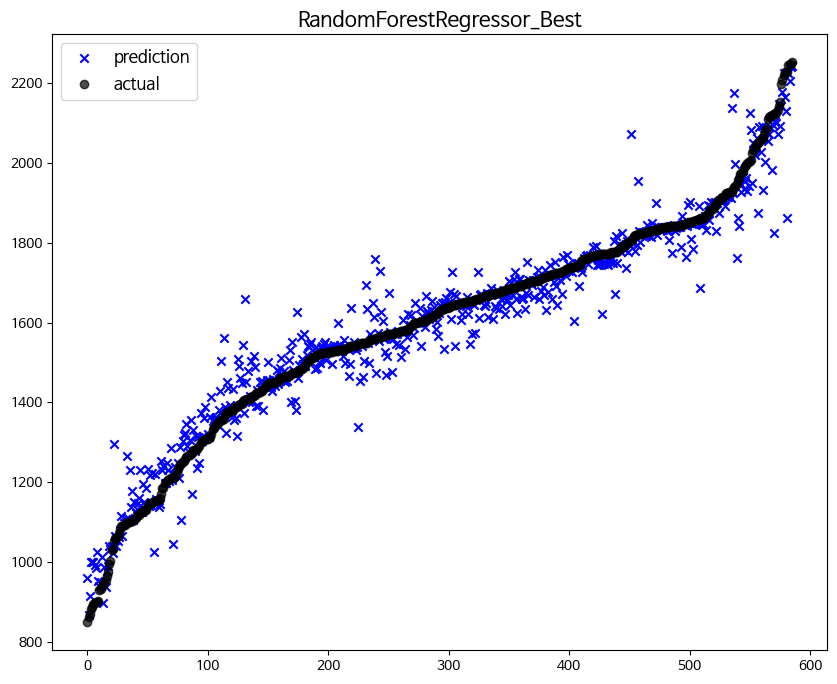

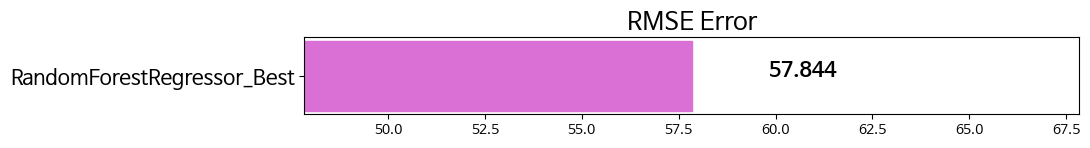


                            Adjusted R_2       rmse  \
RandomForestRegressor_Best      0.957151  57.843919   

                                                 model  
RandomForestRegressor_Best  RandomForestRegressor_Best  


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
rf_best_model2.fit(X_train, y_train)

# 모델 예측
rf_pred2 = rf_best_model2.predict(X_test)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor_Best', rf_pred2, y_test)

### **2) CatBoostRegressor**

#### **a. Base Model**

In [ ]:
# !pip install catboost

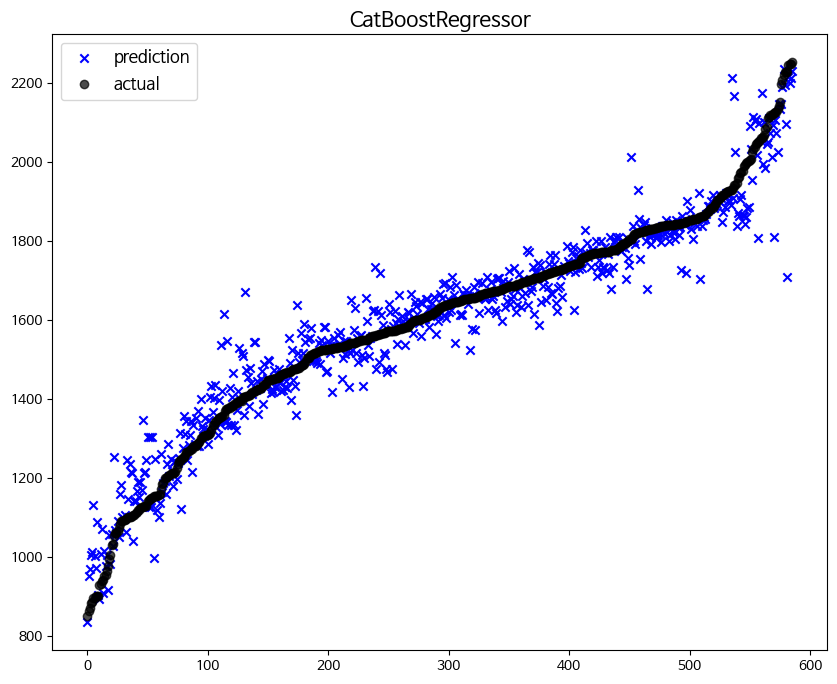

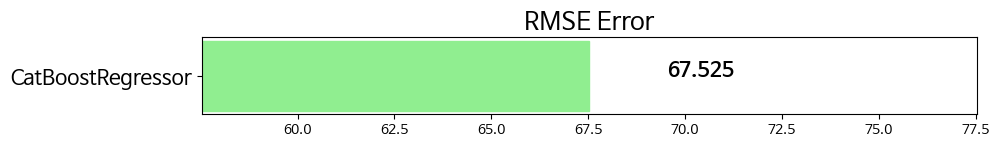


                   Adjusted R_2       rmse              model
CatBoostRegressor      0.941609  67.524555  CatBoostRegressor


In [ ]:
from catboost import CatBoostRegressor

# 기본 모델 생성
catboost_base2 = CatBoostRegressor(random_seed = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
catboost_base2.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred2 = catboost_base2.predict(X_test)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor', catboost_pred2, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'border_count': [200, 254, 300],  # 결정 경계(borders)의 수, 트리 노드 분할에 사용
    'depth': [4, 6, 8],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.5],  # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'iterations': [500, 1000],  # 반복 횟수, 학습 과정에서 사용되는 트리의 수
    'l2_leaf_reg': [1, 3, 5],  # L2 정규화의 강도, 모델의 과적합을 제어
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(rmse, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

catboost_base = CatBoostRegressor(random_seed = 42)

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
catboost_grid_search = GridSearchCV(catboost_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
catboost_grid_search.fit(X_train, y_train, verbose = 0)

# 최적 모델 저장
catboost_best_model2 = catboost_grid_search.best_estimator_

print("최적 파라미터 조합:", catboost_grid_search.best_params_)

최적 파라미터 조합: {'border_count': 200, 'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


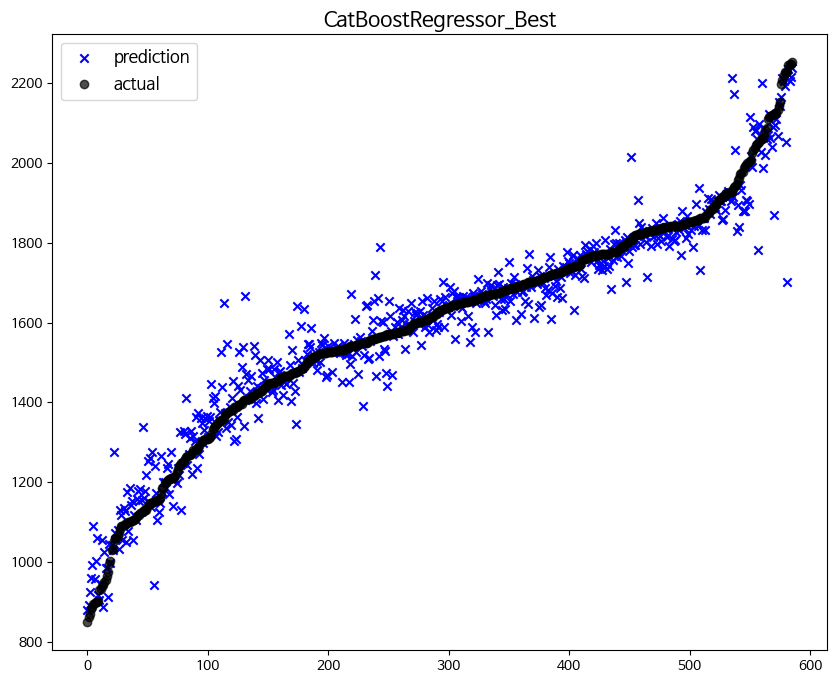

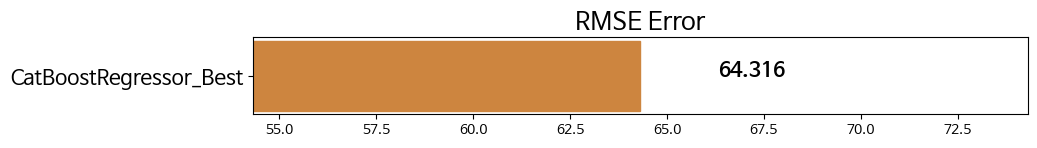


                        Adjusted R_2       rmse                   model
CatBoostRegressor_Best      0.947026  64.316039  CatBoostRegressor_Best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
catboost_best_model2.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred2 = catboost_best_model2.predict(X_test)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor_Best', catboost_pred2, y_test)

### **3) XGBRegressor**

#### **a. Base Model**

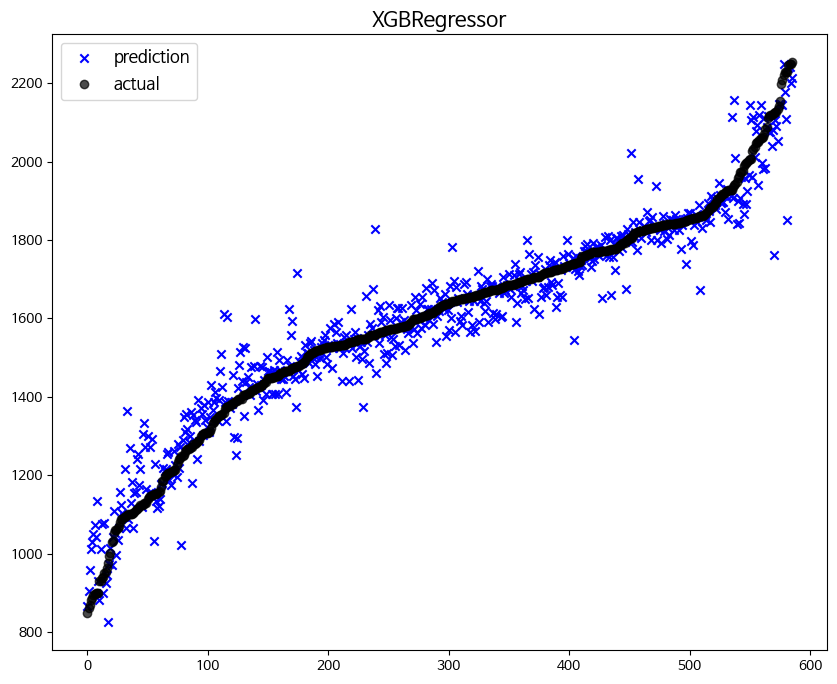

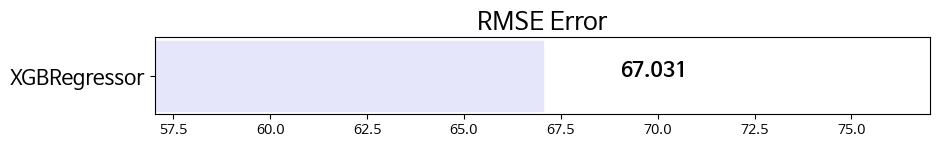


              Adjusted R_2       rmse         model
XGBRegressor      0.942459  67.031291  XGBRegressor


In [ ]:
from xgboost import XGBRegressor

# 기본 모델 생성
xgb_base2 = XGBRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
xgb_base2.fit(X_train, y_train, verbose=0)

# 모델 예측
xgb_pred2 = xgb_base2.predict(X_test)

# 모델 평가 및 시각화
model_eval('XGBRegressor', xgb_pred2, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2], # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'max_depth': [None, 3, 4], # 트리의 최대 깊이
    'n_estimators': [100, 200, 300], # 트리의 수, 반복 횟수
    'subsample': [None, 0.8, 1.0], # 각 트리를 학습시킬 때 사용할 샘플의 비율
    'colsample_bytree': [None, 0.8, 1.0] # 각 트리를 학습시킬 때 사용할 피처의 비율
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(rmse, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

xgb_base = XGBRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
xgb_grid_search = GridSearchCV(xgb_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
xgb_grid_search.fit(X_train, y_train)

# 최적 모델 저장
xgb_best_model2 = xgb_grid_search.best_estimator_

print("최적 파라미터 조합:", xgb_grid_search.best_params_)

최적 파라미터 조합: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 300, 'subsample': 0.8}


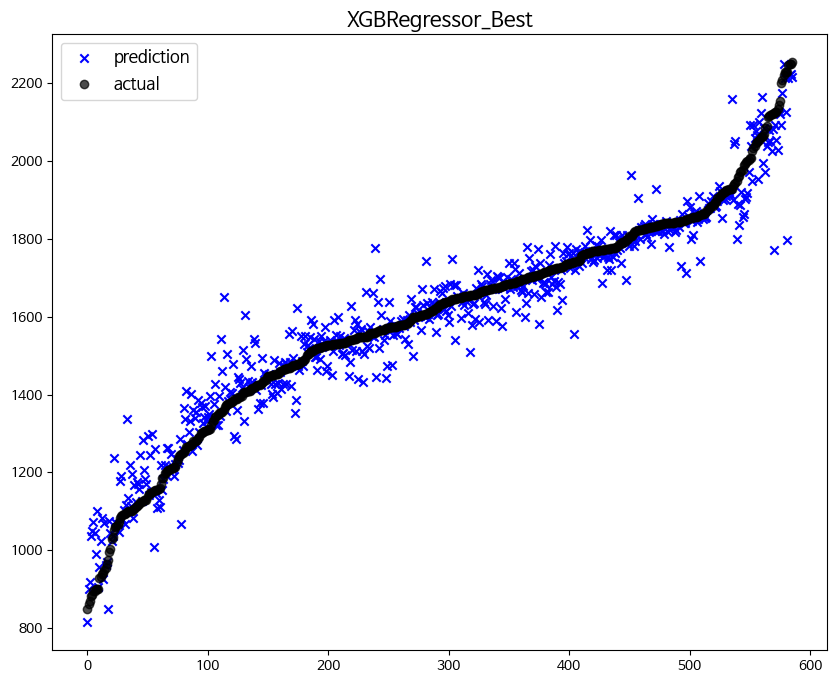

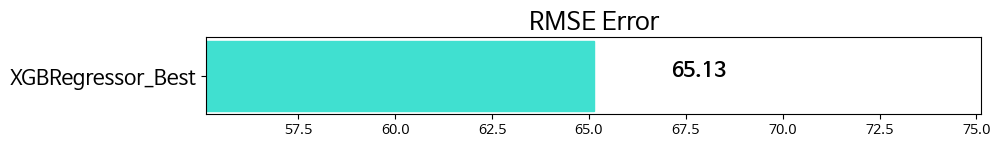


                   Adjusted R_2      rmse              model
XGBRegressor_Best      0.945676  65.13008  XGBRegressor_Best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
xgb_best_model2.fit(X_train, y_train, verbose = 0)

# 모델 예측
xgb_pred2 = xgb_best_model2.predict(X_test)

# 모델 평가 및 시각화
model_eval('XGBRegressor_Best', xgb_pred2, y_test)

### **4) ExtraTreesRegressor**

#### **a. Base Model**

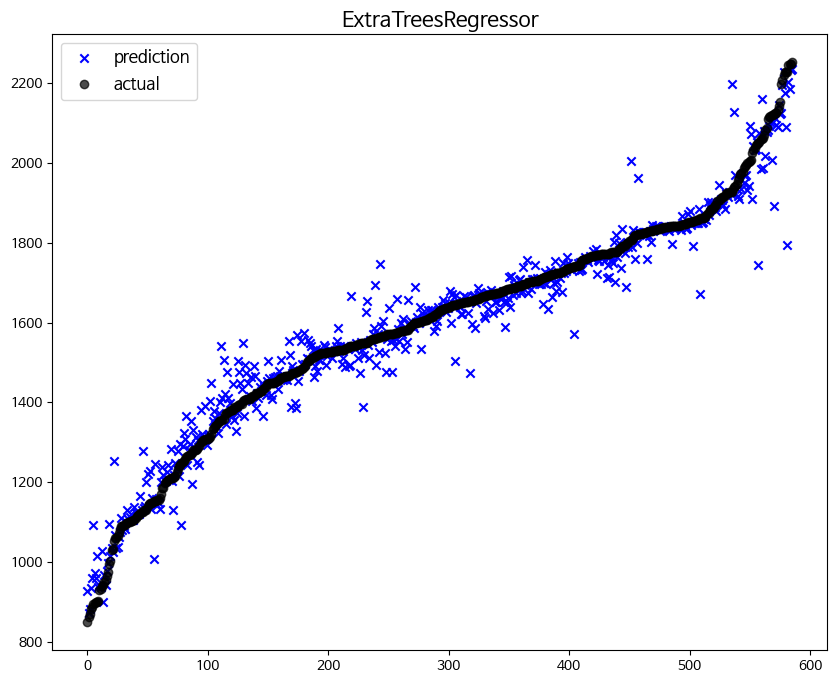

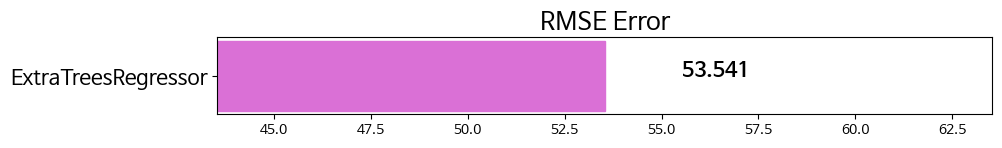


                     Adjusted R_2       rmse                model
ExtraTreesRegressor      0.963289  53.541025  ExtraTreesRegressor


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# 기본 모델 생성
et_base2 = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
et_base2.fit(X_train, y_train)

# 모델 예측
et_pred2 = et_base2.predict(X_test)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor', et_pred2, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],         # 트리의 수, 반복 횟수
    'max_depth': [None, 10, 20],             # 트리의 최대 깊이
    'min_samples_split': [1, 2, 4],         # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],           # 리프 노드에 필요한 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'] # 노드에서 고려할 최대 피처 수
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(rmse, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

et_base = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
et_grid_search = GridSearchCV(et_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
et_grid_search.fit(X_train, y_train)

# 최적 모델 저장
et_best_model2 = et_grid_search.best_estimator_

print("최적 파라미터 조합:", et_grid_search.best_params_)

최적 파라미터 조합: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


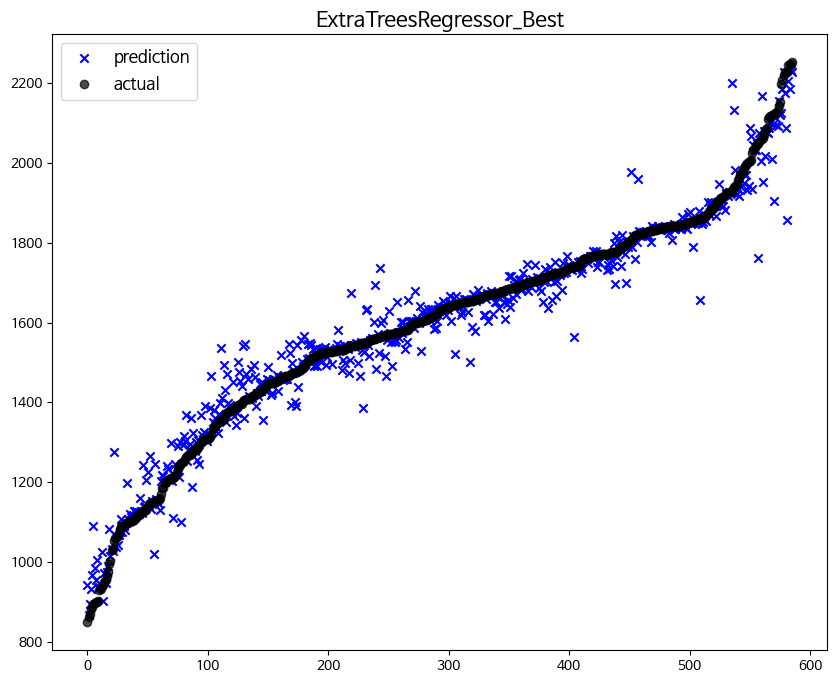

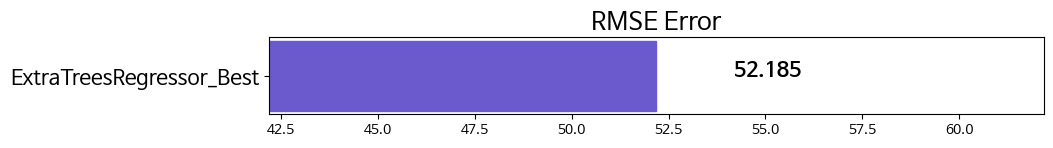


                          Adjusted R_2       rmse                     model
ExtraTreesRegressor_Best      0.965125  52.184729  ExtraTreesRegressor_Best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
et_best_model2.fit(X_train, y_train)

# 모델 예측
et_pred2 = et_best_model2.predict(X_test)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor_Best', et_pred2, y_test)

### **5) LGBMRegressor**

#### **a. Base Model**

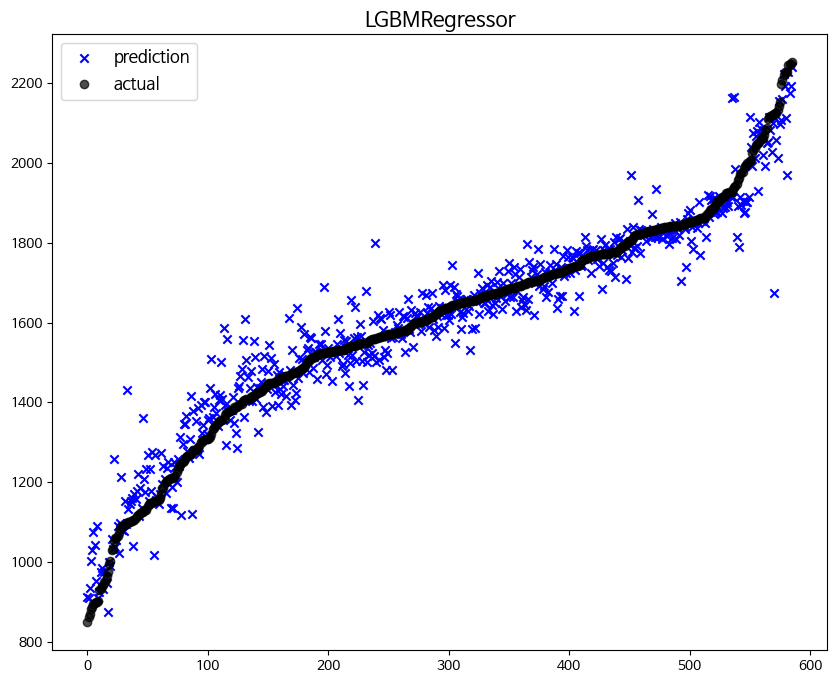

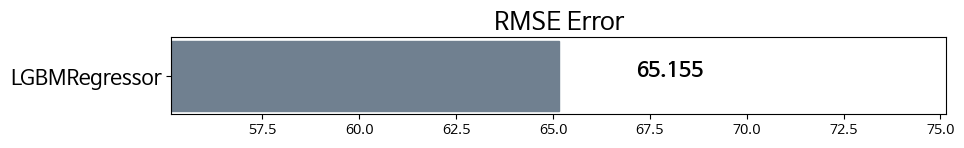


               Adjusted R_2       rmse          model
LGBMRegressor      0.945635  65.154903  LGBMRegressor


In [ ]:
from lightgbm import LGBMRegressor

# 기본 모델 생성
lgbm_base2 = LGBMRegressor(random_state = 42, verbosity=-1)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
lgbm_base2.fit(X_train, y_train)

# 모델 예측
lgbm_pred2 = lgbm_base2.predict(X_test)

# 모델 평가 및 시각화
model_eval('LGBMRegressor', lgbm_pred2, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [100, 300, 500],  # 트리의 개수
    'learning_rate': [0.01, 0.1, 0.5],  # 학습률
    'max_depth': [None, 5, 10],  # 트리의 최대 깊이
    'min_child_samples': [20, 50, 100],  # 각 리프 노드에 필요한 최소 샘플 수
    'subsample': [0.8, 1.0],  # 각 트리에 사용될 데이터 샘플링 비율
    'colsample_bytree': [0.8, 1.0],  # 각 트리에 사용될 피처 샘플링 비율
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(rmse, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

lgbm_base = LGBMRegressor(random_state = 42, verbosity=-1)

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
lgbm_grid_search = GridSearchCV(lgbm_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
lgbm_grid_search.fit(X_train, y_train)

# 최적 모델 저장
lgbm_best_model2 = lgbm_grid_search.best_estimator_

print("최적 파라미터 조합:", lgbm_grid_search.best_params_)

최적 파라미터 조합: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': None, 'min_child_samples': 20, 'n_estimators': 300, 'subsample': 0.8}


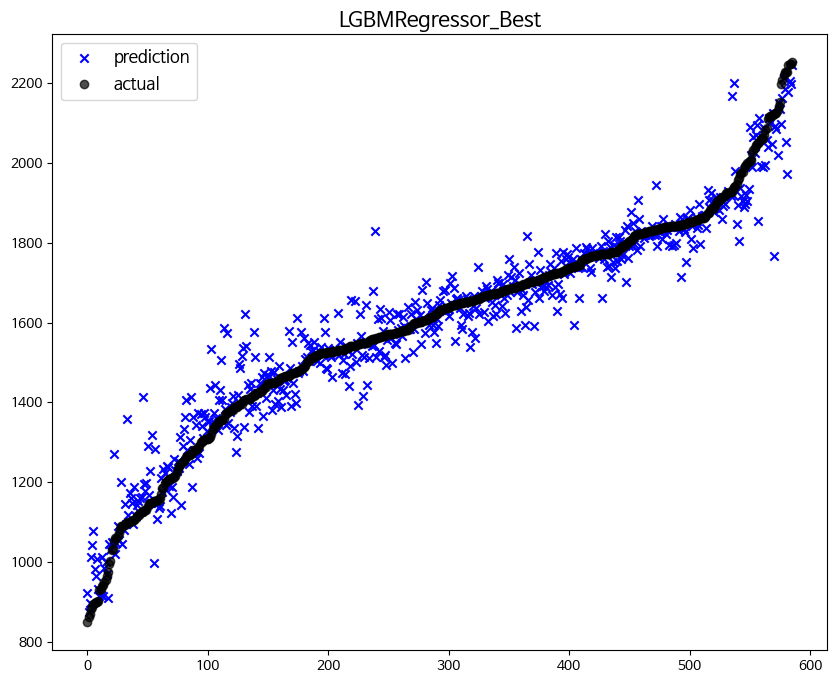

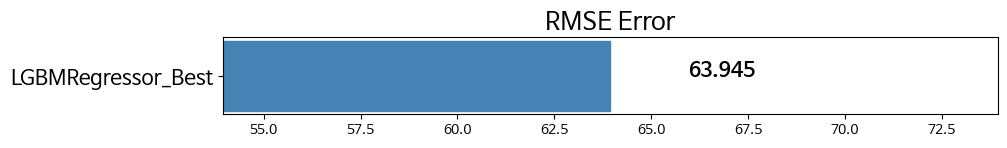


                    Adjusted R_2       rmse               model
LGBMRegressor_Best      0.947635  63.945197  LGBMRegressor_Best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
lgbm_best_model2.fit(X_train, y_train)

# 모델 예측
lgbm_pred2 = lgbm_best_model2.predict(X_test)

# 모델 평가 및 시각화
model_eval('LGBMRegressor_Best', lgbm_pred2, y_test)

### **⏺ 최적 모델로 예측**

- 모델별 성능 비교

|Model|RMSE|Adj R^2|
|-------|----|----|
|RandomForestRegressor|57.844|0.9572|
|CatBoostRegressor|64.316|0.9470|
|XGBRegressor|65.130|0.9457|
|ExtraTreesRegressor|52.185|0.9651|
|LGBMRegressor|63.945|0.9476|

- rmse와 Adjusted R-Square 측면에서 모두 ExtraTreesRegressor의 성능이 가장 좋음을 확인할 수 있다.

In [ ]:
# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

best_model2 = ExtraTreesRegressor(max_depth = 20, max_features = 'auto', min_samples_leaf = 1,
                                  min_samples_split = 2, n_estimators = 200,
                                  n_jobs = -1, random_state = 42)

# 모델 학습
best_model2.fit(X_train, y_train)

# 모델 예측
y_pred2 = best_model2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
# 예측 성능 확인

rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print(f"Group 2 RMSE: {rmse2:.3f}")

Group 2 RMSE: 52.185


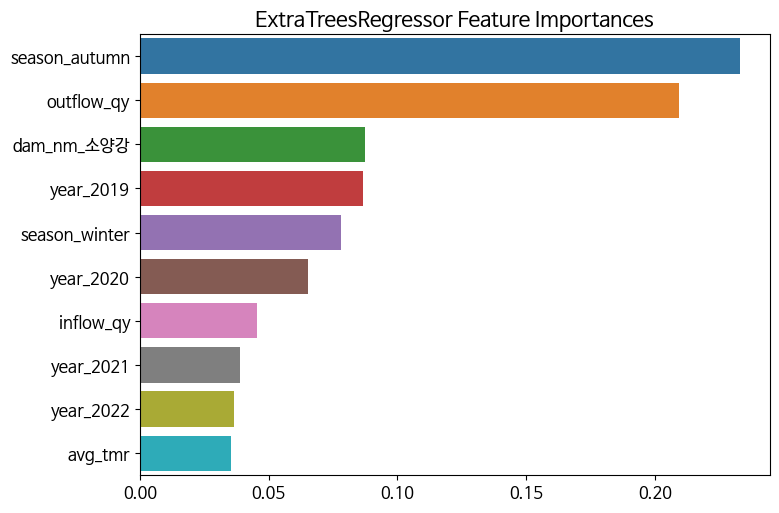

In [ ]:
# 피처 중요도 시각화

visualize_ftr_importances(best_model2)
plt.show()

In [ ]:
# 역변환을 위한 함수

def reverse_one_hot_encoding(row, prefix):
  cols = [col for col in row.index if col.startswith(prefix)] # 범주형 변수
  value = [col.split('_')[-1] for col in cols if row[col] == 1] # 카테고리

  return value[0] if value else None

In [ ]:
# 범주형 변수를 원래대로

X_test['dam_nm'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('dam_nm_',))
X_test['year'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('year',))
X_test['season'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('season',))

### **⏺ 활용 능력 계산**
- 현재 댐에 저장되어 있는 물 중 얼만큼을 사용할 수 있을까?

In [ ]:
# 현재 저수량 예측값을 DataFrame 형태로 저장

df2 = pd.DataFrame(y_pred2, columns = ['reserve_qy_pred'])
df2.head(3)

reserve_qy_pred
0      1619.819875
1      1540.382760
2      2032.781782

In [ ]:
# 필요한 변수와 결합

df2 = pd.concat([X_test[['dam_nm', 'year', 'season']], df2, group2_te[['unused_qy', 'maximum_use_qy']]], axis = 1) # 열 방향 결합
df2.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy
0    소양강  2021  summer      1619.819875      650.0          1750.0
1    소양강  2019  summer      1540.382760      650.0          1900.0
2    소양강  2022  autumn      2032.781782      650.0          1900.0

In [ ]:
# 활용 가능 용량 계산
def calculate_usable_qy(data):
    usable_qy = data['reserve_qy_pred'] - data['unused_qy']
    return min(usable_qy, data['maximum_use_qy']) # (최대) 이수용량을 초과하여 댐의 물을 이용할 수는 없음(관련 기관의 승인 필요)

df2['usable_qy'] = df2.apply(calculate_usable_qy, axis = 1)

In [ ]:
df2.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy  \
0    소양강  2021  summer      1619.819875      650.0          1750.0   
1    소양강  2019  summer      1540.382760      650.0          1900.0   
2    소양강  2022  autumn      2032.781782      650.0          1900.0   

     usable_qy  
0   969.819875  
1   890.382760  
2  1382.781782

In [ ]:
# 활용 능력 계산
# (최대) 이수용량과 비교하였을 때 얼만큼의 물을 활용할 수 있는가

df2['efficiency'] = df2['usable_qy'] / df2['maximum_use_qy']
df2.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy  \
0    소양강  2021  summer      1619.819875      650.0          1750.0   
1    소양강  2019  summer      1540.382760      650.0          1900.0   
2    소양강  2022  autumn      2032.781782      650.0          1900.0   

     usable_qy  efficiency  
0   969.819875    0.554183  
1   890.382760    0.468623  
2  1382.781782    0.727780

In [ ]:
df2.groupby('dam_nm')['efficiency'].describe()

count      mean       std       min       25%       50%       75%  \
dam_nm                                                                      
소양강     293.0  0.552270  0.115761  0.241336  0.468329  0.537147  0.626914   
충주      293.0  0.507061  0.160001  0.151792  0.388524  0.537072  0.638678   

             max  
dam_nm            
소양강     0.833481  
충주      0.838919

## **🌊 Group 3**

In [ ]:
group3_tr = train_groups[2]
group3_te = test_groups[2]

In [ ]:
group3_tr.describe()

rain_qy    inflow_qy   outflow_qy   reserve_qy   reserve_rt  \
count  5589.000000  5589.000000  5589.000000  5589.000000  5589.000000   
mean      0.480046     1.919669     2.680403   367.839132     0.577281   
std       0.972959     1.133572     0.695170   161.430589     0.165830   
min       0.000000     0.000000     0.000000    81.409000     0.174700   
25%       0.000000     1.193013     2.280544   257.770000     0.456300   
50%       0.000000     1.769684     2.693207   319.128000     0.587100   
75%       0.327143     2.474520     2.872377   463.034000     0.685000   
max       4.900763     7.448463     7.514343   753.723000     0.979000   

            tot_qy     valid_qy   unused_qy  maximum_use_qy      avg_hmd  ...  \
count  5589.000000  5589.000000  5589.00000     5589.000000  5589.000000  ...   
mean    623.631777   487.131508    78.57309      485.789229     0.700318  ...   
std     153.524868   114.402424    51.90736      113.533464     0.145172  ...   
min     457.000000   352.000000     6.70000      352.000000     0.008000  ...   
25%     466.000000   424.000000    45.00000      424.000000     0.604000  ...   
50%     595.000000   429.000000    70.00000      429.000000     0.723000  ...   
75%     790.000000   560.000000   124.00000      560.000000     0.804000  ...   
max     815.000000   672.000000   150.00000      672.000000     0.999000  ...   

       dam_nm_주암(본)    dam_nm_합천    year_2019    year_2020    year_2021  \
count   5589.000000  5589.000000  5589.000000  5589.000000  5589.000000   
mean       0.201109     0.195205     0.241009     0.256218     0.249240   
std        0.400865     0.396394     0.427734     0.436582     0.432611   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        0.000000     0.000000     0.000000     1.000000     0.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

         year_2022  season_autumn  season_spring  season_summer  season_winter  
count  5589.000000    5589.000000    5589.000000    5589.000000    5589.000000  
mean      0.253534       0.252460       0.249776       0.249955       0.247808  
std       0.435073       0.434463       0.432922       0.433026       0.431778  
min       0.000000       0.000000       0.000000       0.000000       0.000000  
25%       0.000000       0.000000       0.000000       0.000000       0.000000  
50%       0.000000       0.000000       0.000000       0.000000       0.000000  
75%       1.000000       1.000000       0.000000       0.000000       0.000000  
max       1.000000       1.000000       1.000000       1.000000       1.000000  

[8 rows x 26 columns]

### **1) 랜덤 포레스트(RandomForestRegressor)**

#### **a. Base Model**

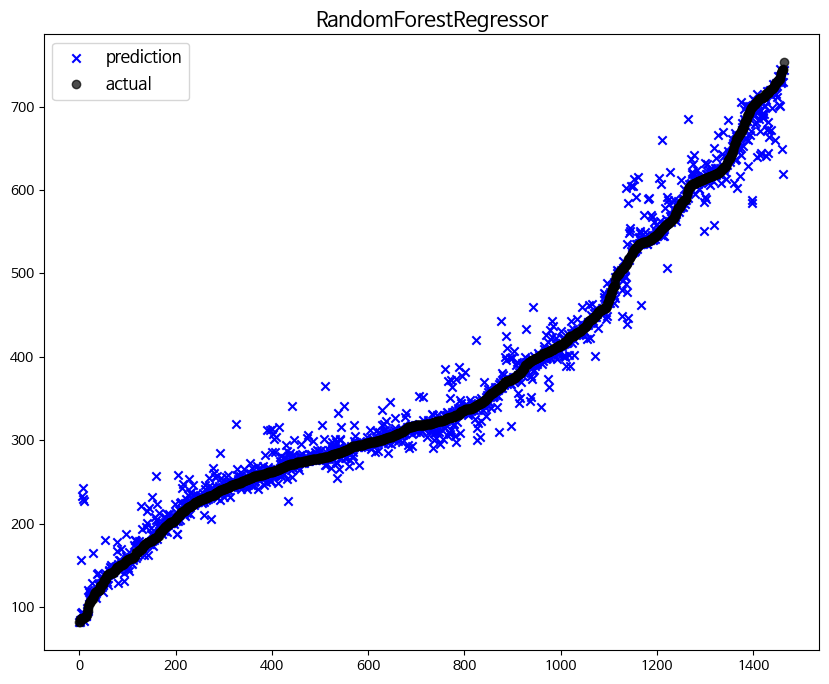

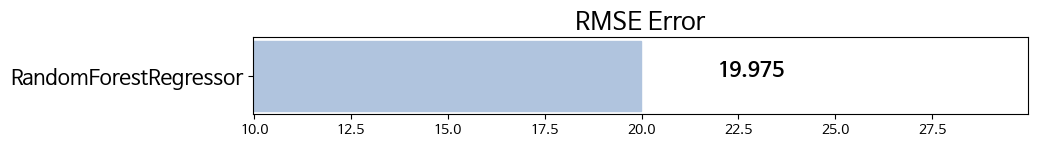


                       Adjusted R_2       rmse                  model
RandomForestRegressor       0.98459  19.974566  RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 기본 모델 생성
rf_base3 = RandomForestRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# 모델 학습
rf_base3.fit(X_train, y_train)

# 모델 예측
rf_pred3 = rf_base3.predict(X_test)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor', rf_pred3, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리 개수
    'max_depth': [None, 10, 20],     # 최대 깊이(None은 제한 없음을 의미)
    'min_samples_split': [2, 3, 4], # 노드 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 3],   # 리프 노드를 위한 최소 샘플 수
    'max_features':[None, 1, 2] # 트리 분할 시 사용할 최대 특성의 수
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

rf_base = RandomForestRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
rf_grid_search = GridSearchCV(rf_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
rf_grid_search.fit(X_train, y_train)

# 최적 모델 저장
rf_best_model3 = rf_grid_search.best_estimator_

print("최적 파라미터 조합:", rf_grid_search.best_params_)

최적 파라미터 조합: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


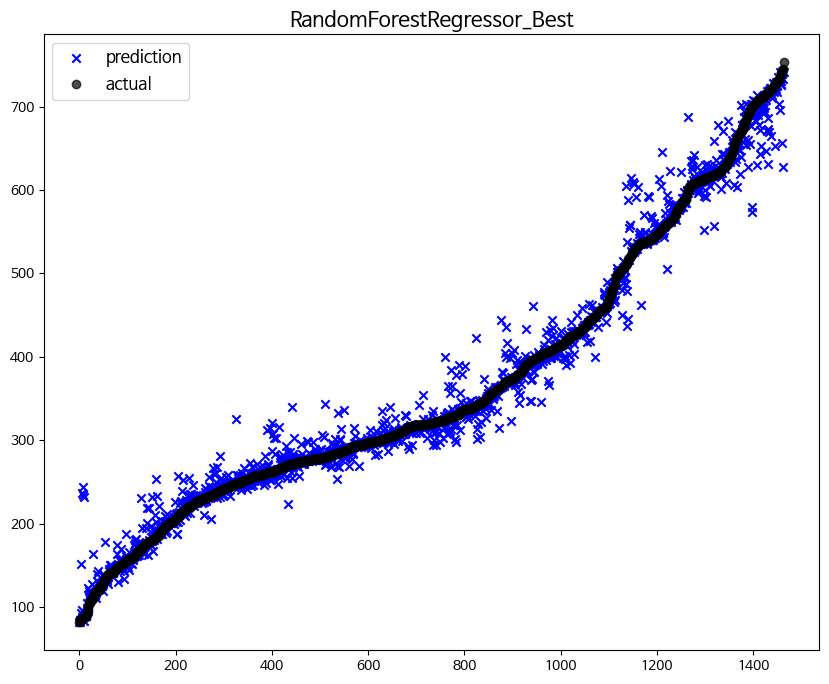

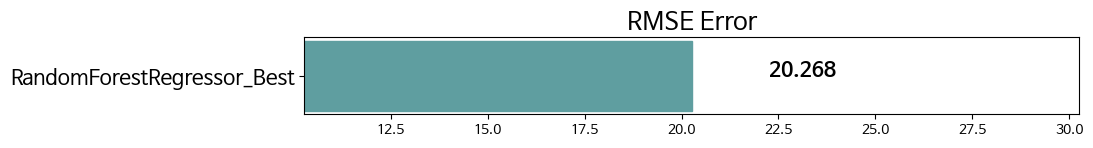


                            Adjusted R_2       rmse  \
RandomForestRegressor_Best      0.984133  20.268103   

                                                 model  
RandomForestRegressor_Best  RandomForestRegressor_Best  


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# 모델 학습
rf_best_model3.fit(X_train, y_train)

# 모델 예측
rf_pred3 = rf_best_model3.predict(X_test)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor_Best', rf_pred3, y_test)

- 하이퍼 파라미터 튜닝을 진행하지 않은 **base model**의 성능이 더 좋다.

### **2) CatBoostRegressor**

#### **a. Base Model**

In [ ]:
!pip install catboost

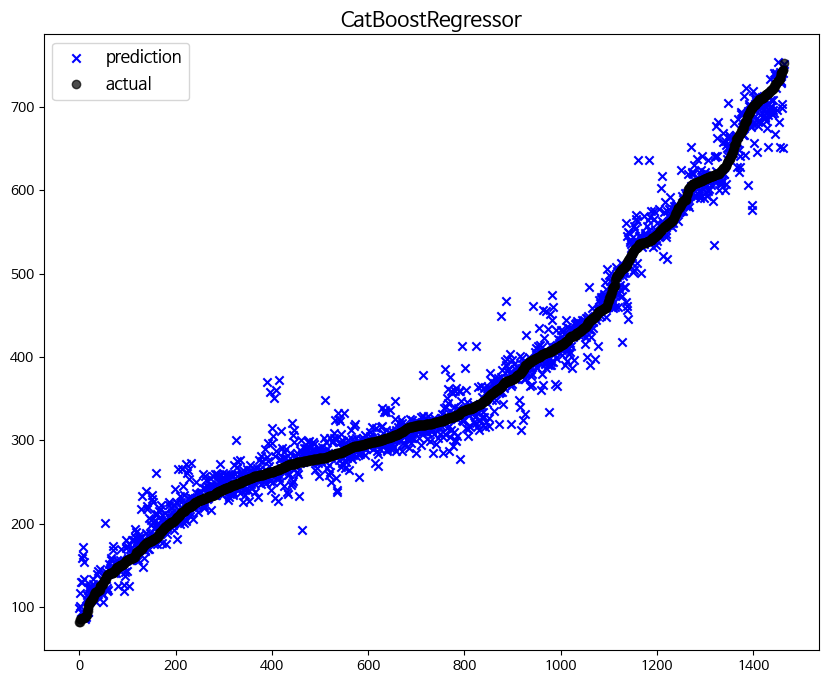

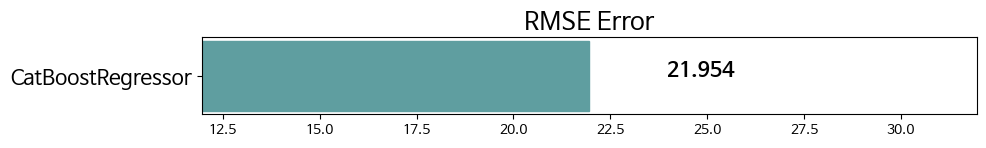


                   Adjusted R_2      rmse              model
CatBoostRegressor      0.981384  21.95375  CatBoostRegressor


In [ ]:
from catboost import CatBoostRegressor

# 기본 모델 생성
catboost_base3 = CatBoostRegressor(random_seed = 42, verbose = 0)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# 모델 학습
catboost_base3.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred3 = catboost_base3.predict(X_test)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor', catboost_pred3, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'border_count': [200, 254, 300],  # 결정 경계(borders)의 수, 트리 노드 분할에 사용
    'depth': [6, 8, 10],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'iterations': [100, 200, 300],  # 반복 횟수, 학습 과정에서 사용되는 트리의 수
    'l2_leaf_reg': [1, 3, 5],  # L2 정규화의 강도, 모델의 과적합을 제어
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

catboost_base = CatBoostRegressor(random_seed = 42)

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
catboost_grid_search = GridSearchCV(catboost_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
catboost_grid_search.fit(X_train, y_train, verbose = 0)

# 최적 모델 저장
catboost_best_model3 = catboost_grid_search.best_estimator_

print("최적 파라미터 조합:", catboost_grid_search.best_params_)

최적 파라미터 조합: {'border_count': 300, 'depth': 6, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.2}


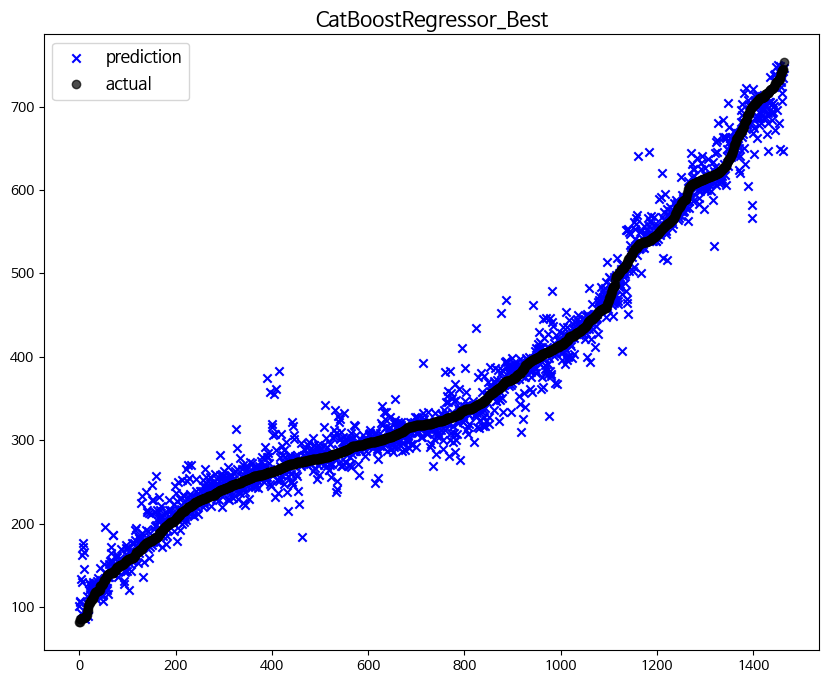

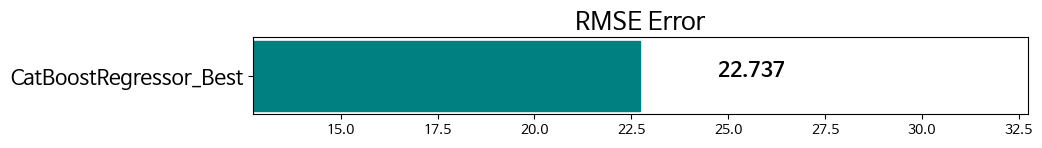


                        Adjusted R_2      rmse                   model
CatBoostRegressor_Best      0.980032  22.73722  CatBoostRegressor_Best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# 모델 학습
catboost_best_model3.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred3 = catboost_best_model3.predict(X_test)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor_Best', catboost_pred3, y_test)

- 하이퍼 파라미터 튜닝을 진행하지 않은 **base model**의 성능이 더 좋다.

### **3) XGBRegressor**

#### **a. Base Model**

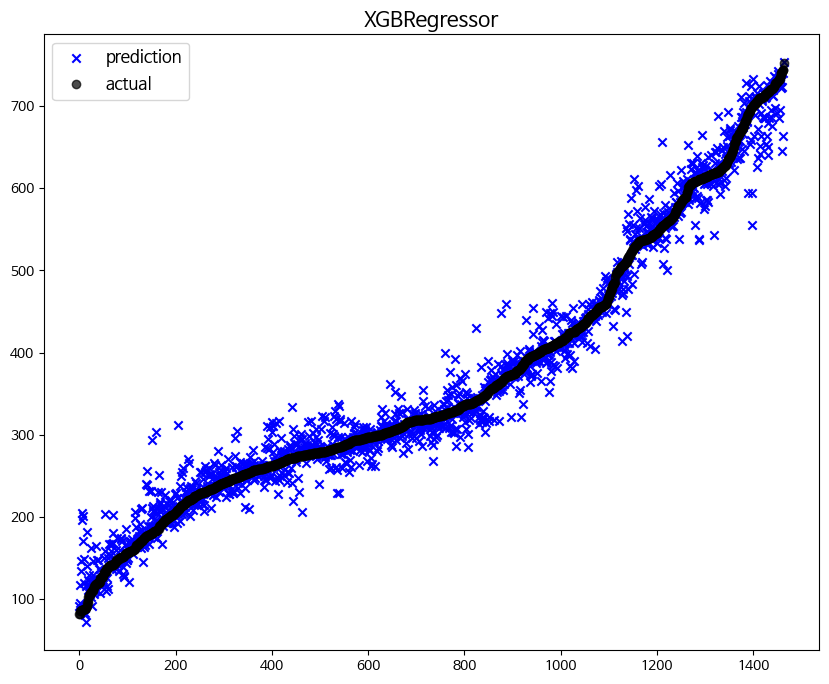

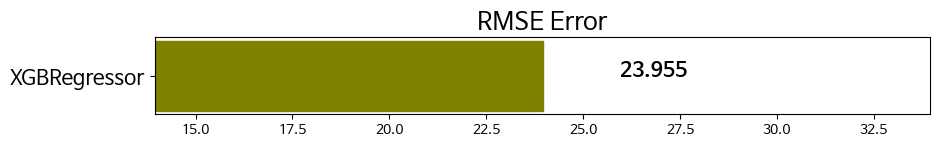


              Adjusted R_2       rmse         model
XGBRegressor      0.977836  23.955017  XGBRegressor


In [ ]:
from xgboost import XGBRegressor

# 기본 모델 생성
xgb_base3 = XGBRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# 모델 학습
xgb_base3.fit(X_train, y_train, verbose = 0)

# 모델 예측
xgb_pred3 = xgb_base3.predict(X_test)

# 모델 평가 및 시각화
model_eval('XGBRegressor', xgb_pred3, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2], # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'max_depth': [None, 3, 4], # 트리의 최대 깊이
    'n_estimators': [100, 200, 300], # 트리의 수, 반복 횟수
    'subsample': [None, 0.8, 1.0], # 각 트리를 학습시킬 때 사용할 샘플의 비율
    'colsample_bytree': [None, 0.8, 1.0] # 각 트리를 학습시킬 때 사용할 피처의 비율
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

xgb_base = XGBRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
xgb_grid_search = GridSearchCV(xgb_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
xgb_grid_search.fit(X_train, y_train)

# 최적 모델 저장
xgb_best_model3 = xgb_grid_search.best_estimator_

print("최적 파라미터 조합:", xgb_grid_search.best_params_)

최적 파라미터 조합: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 300, 'subsample': 0.8}


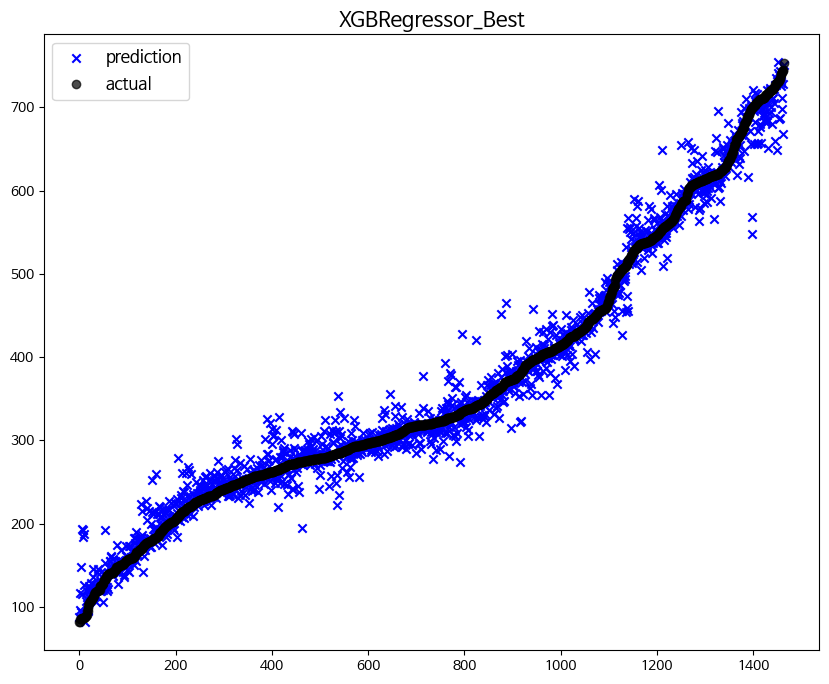

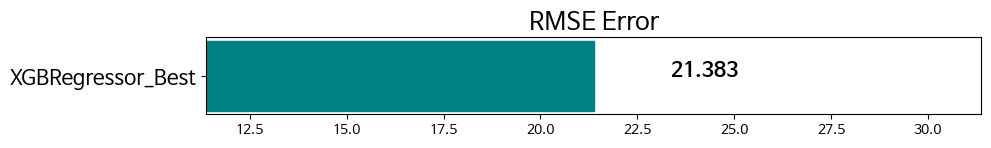


                   Adjusted R_2      rmse              model
XGBRegressor_Best       0.98234  21.38281  XGBRegressor_Best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# 모델 학습
xgb_best_model3.fit(X_train, y_train, verbose = 0)

# 모델 예측
xgb_pred3 = xgb_best_model3.predict(X_test)

# 모델 평가 및 시각화
model_eval('XGBRegressor_Best', xgb_pred3, y_test)

### **4) ExtraTreesRegressor**

#### **a. Base Model**

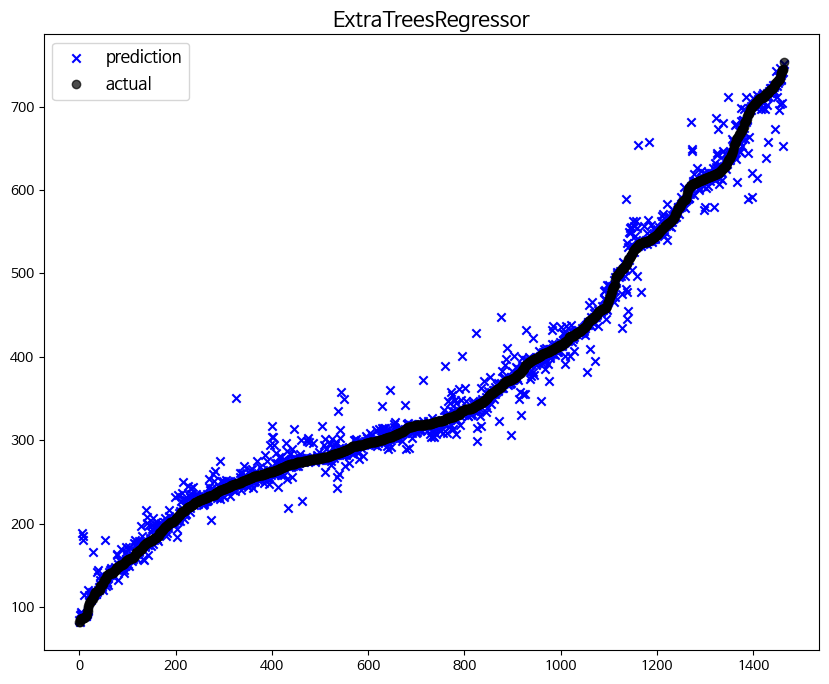

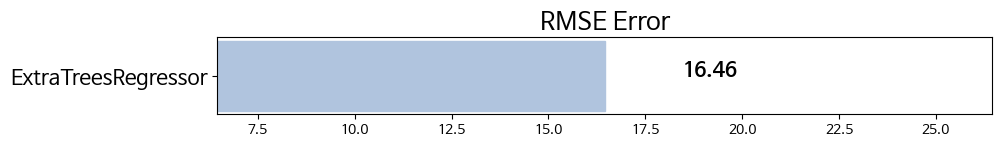


                     Adjusted R_2       rmse                model
ExtraTreesRegressor      0.989535  16.460193  ExtraTreesRegressor


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# 기본 모델 생성
et_base3 = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# 모델 학습
et_base3.fit(X_train, y_train)

# 모델 예측
et_pred3 = et_base3.predict(X_test)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor', et_pred3, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],         # 트리의 수, 반복 횟수
    'max_depth': [None, 10, 20],             # 트리의 최대 깊이
    'min_samples_split': [2, 3, 4],         # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [2, 3, 4],           # 리프 노드에 필요한 최소 샘플 수
    'max_features': ['sqrt', 1] # 노드에서 고려할 최대 피처 수
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

et_base = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
et_grid_search = GridSearchCV(et_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE', verbose = 0)
et_grid_search.fit(X_train, y_train)

# 최적 모델 저장
et_best_model3 = et_grid_search.best_estimator_

print("최적 파라미터 조합:", et_grid_search.best_params_)

최적 파라미터 조합: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


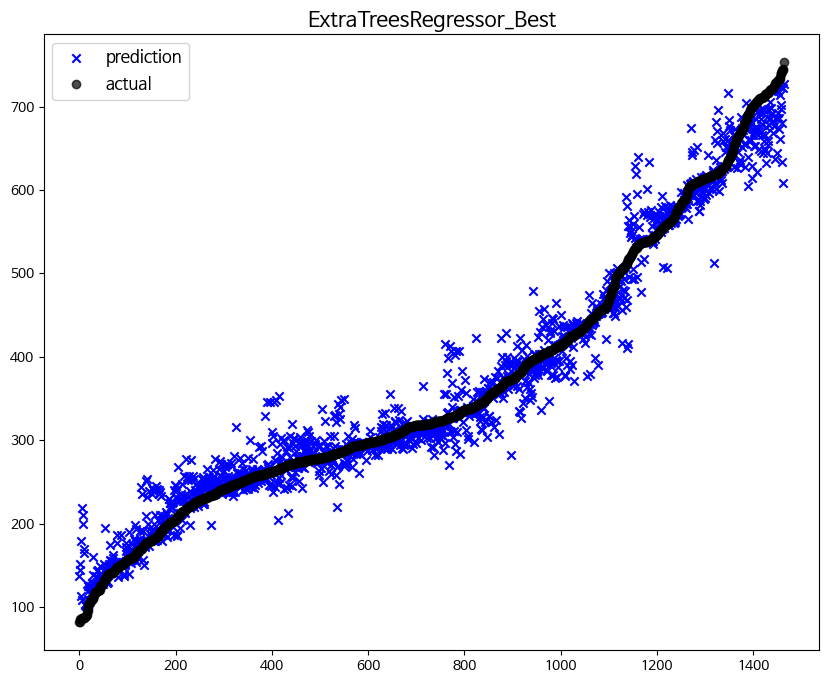

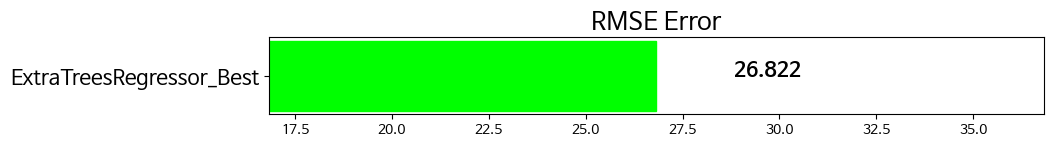


                          Adjusted R_2      rmse                     model
ExtraTreesRegressor_Best      0.972213  26.82217  ExtraTreesRegressor_Best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# 모델 학습
et_best_model3.fit(X_train, y_train)

# 모델 예측
et_pred3 = et_best_model3.predict(X_test)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor_Best', et_pred3, y_test)

- 하이퍼 파라미터 튜닝을 진행하지 않은 **base model**의 성능이 더 좋다.

### **5) LGBMRegressor**

#### **a. Base Model**

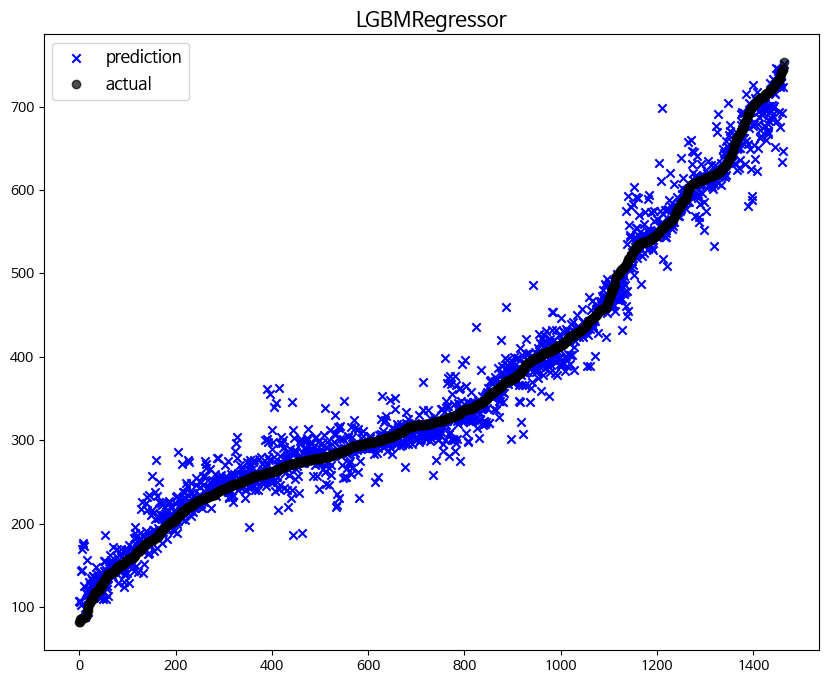

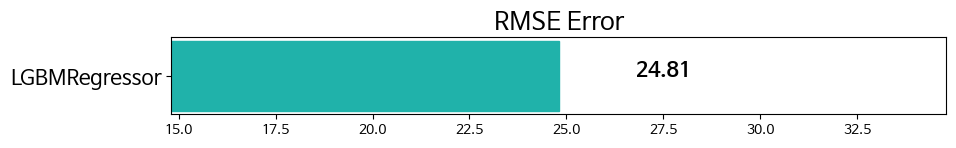


               Adjusted R_2      rmse          model
LGBMRegressor      0.976226  24.80997  LGBMRegressor


In [ ]:
from lightgbm import LGBMRegressor

# 기본 모델 생성
lgbm_base3 = LGBMRegressor(random_state = 42, verbosity=-1)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# 모델 학습
lgbm_base3.fit(X_train, y_train)

# 모델 예측
lgbm_pred3 = lgbm_base3.predict(X_test)

# 모델 평가 및 시각화
model_eval('LGBMRegressor', lgbm_pred3, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [100, 300, 500],  # 트리의 개수
    'learning_rate': [0.01, 0.1, 0.5],  # 학습률
    'max_depth': [None, 5, 10],  # 트리의 최대 깊이
    'min_child_samples': [20, 50, 100],  # 각 리프 노드에 필요한 최소 샘플 수
    'subsample': [0.8, 1.0],  # 각 트리에 사용될 데이터 샘플링 비율
    'colsample_bytree': [0.8, 1.0],  # 각 트리에 사용될 피처 샘플링 비율
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

lgbm_base = LGBMRegressor(random_state = 42, verbosity=-1)

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
lgbm_grid_search = GridSearchCV(lgbm_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
lgbm_grid_search.fit(X_train, y_train)

# 최적 모델 저장
lgbm_best_model3 = lgbm_grid_search.best_estimator_

print("최적 파라미터 조합:", lgbm_grid_search.best_params_)

최적 파라미터 조합: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': None, 'min_child_samples': 20, 'n_estimators': 500, 'subsample': 0.8}


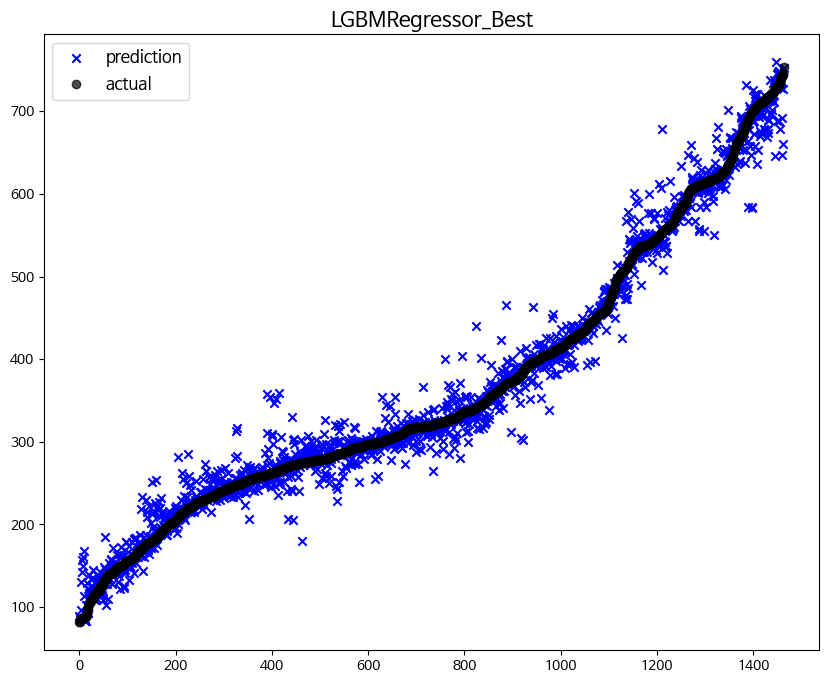

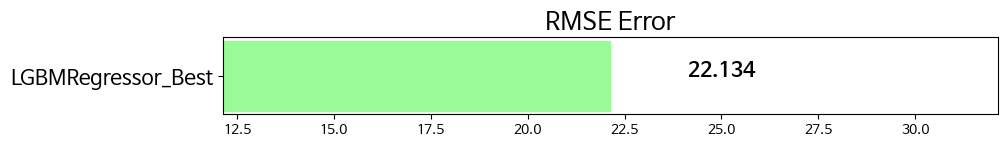


                    Adjusted R_2       rmse               model
LGBMRegressor_Best      0.981077  22.134286  LGBMRegressor_Best


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

# 모델 학습
lgbm_best_model3.fit(X_train, y_train)

# 모델 예측
lgbm_pred3 = lgbm_best_model3.predict(X_test)

# 모델 평가 및 시각화
model_eval('LGBMRegressor_Best', lgbm_pred3, y_test)

### **⏺ 최적 모델로 예측**

- 모델별 성능 비교

|Model|RMSE|Adj R^2|
|-------|----|----|
|RandomForestRegressor|19.975|0.9846|
|CatBoostRegressor|21.954|0.9814|
|XGBRegressor|21.383|0.9823|
|ExtraTreesRegressor|16.460|0.9895|
|LGBMRegressor|22.134|0.9811|

- rmse와 Adjusted R-Square 측면에서 모두 ExtraTreesRegressor의 성능이 가장 좋음을 확인할 수 있다.

In [ ]:
# feature, target 분리
X_train = group3_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group3_tr['reserve_qy']

X_test = group3_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group3_te['reserve_qy']

best_model3 = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

# 모델 학습
best_model3.fit(X_train, y_train)

# 모델 예측
y_pred3 = best_model3.predict(X_test)

In [ ]:
# 예측 성능 확인

rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print(f"Group 3 RMSE: {rmse3:.3f}")

Group 3 RMSE: 16.460


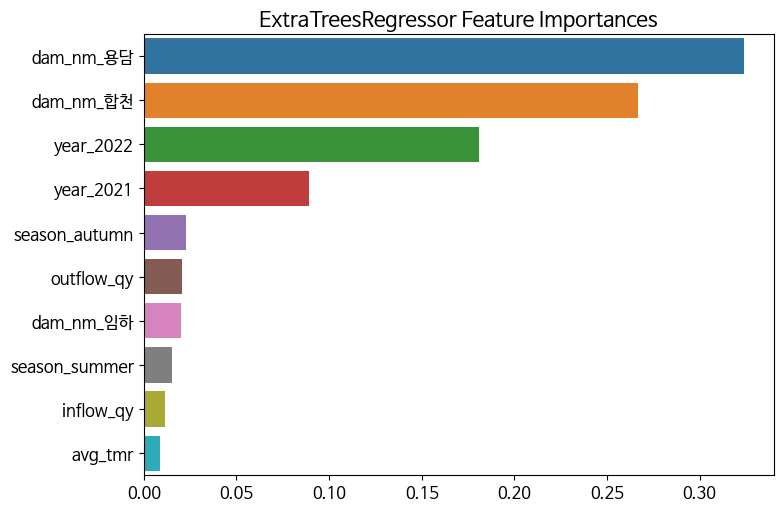

In [ ]:
# 피처 중요도 시각화

visualize_ftr_importances(best_model3)
plt.show()

In [ ]:
# 역변환을 위한 함수

def reverse_one_hot_encoding(row, prefix):
  cols = [col for col in row.index if col.startswith(prefix)] # 범주형 변수
  value = [col.split('_')[-1] for col in cols if row[col] == 1] # 카테고리

  return value[0] if value else None

In [ ]:
# 범주형 변수를 원래대로

X_test['dam_nm'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('dam_nm_',))
X_test['year'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('year',))
X_test['season'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('season',))

### **⏺ 활용 능력 계산**
- 현재 댐에 저장되어 있는 물 중 얼만큼을 사용할 수 있을까?

In [ ]:
# 현재 저수량 예측값을 DataFrame 형태로 저장

df3 = pd.DataFrame(y_pred3, columns = ['reserve_qy_pred'])
df3.head(3)

reserve_qy_pred
0       178.917826
1       171.611217
2        88.810119

In [ ]:
# 필요한 변수와 결합

df3 = pd.concat([X_test[['dam_nm', 'year', 'season']], df3, group3_te[['unused_qy', 'maximum_use_qy']]], axis = 1) # 열 방향 결합
df3.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy
0    섬진강  2021  summer       178.917826        6.7           429.0
1    섬진강  2019  summer       171.611217        6.7           429.0
2    섬진강  2022  autumn        88.810119        6.7           429.0

In [ ]:
# 활용 용량 계산
def calculate_usable_qy(data):
    usable_qy = data['reserve_qy_pred'] - data['unused_qy']
    return min(usable_qy, data['maximum_use_qy']) # (최대) 이수용량을 초과하여 댐의 물을 이용할 수는 없음(관련 기관의 승인 필요)

df3['usable_qy'] = df3.apply(calculate_usable_qy, axis = 1)

In [ ]:
df3.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy   usable_qy
0    섬진강  2021  summer       178.917826        6.7           429.0  172.217826
1    섬진강  2019  summer       171.611217        6.7           429.0  164.911217
2    섬진강  2022  autumn        88.810119        6.7           429.0   82.110119

In [ ]:
# 활용 능력 계산
# (최대) 이수용량과 비교하였을 때 얼만큼의 물을 활용할 수 있는가

df3['efficiency'] = df3['usable_qy'] / df3['maximum_use_qy']
df3.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy  \
0    섬진강  2021  summer       178.917826        6.7           429.0   
1    섬진강  2019  summer       171.611217        6.7           429.0   
2    섬진강  2022  autumn        88.810119        6.7           429.0   

    usable_qy  efficiency  
0  172.217826    0.401440  
1  164.911217    0.384408  
2   82.110119    0.191399

In [ ]:
df3.groupby('dam_nm')['efficiency'].describe()

count      mean       std       min       25%       50%       75%  \
dam_nm                                                                      
섬진강     293.0  0.562565  0.166131  0.176858  0.446200  0.630252  0.683327   
용담      293.0  0.717878  0.157881  0.434020  0.571730  0.737616  0.824716   
임하      293.0  0.432059  0.179222  0.077387  0.280743  0.452337  0.583965   
주암(본)   293.0  0.575383  0.194089  0.193145  0.421652  0.607561  0.740797   
합천      293.0  0.602553  0.263375  0.154918  0.371174  0.680819  0.817757   

             max  
dam_nm            
섬진강     0.848928  
용담      1.000000  
임하      0.833714  
주암(본)   0.936573  
합천      1.000000

## **🌊 Group 4**

In [ ]:
group4_tr = train_groups[3]
group4_te = test_groups[3]

In [ ]:
group4_tr.describe()

rain_qy    inflow_qy   outflow_qy   reserve_qy   reserve_rt  \
count  2246.000000  2246.000000  2246.000000  2246.000000  2246.000000   
mean      0.483703     2.884908     3.491700   901.754293     0.658952   
std       0.975172     1.255794     0.777594   134.619268     0.087435   
min       0.000000     0.000000     0.000000   519.211700     0.416000   
25%       0.000000     2.226514     3.167267   821.478000     0.605000   
50%       0.000000     2.890816     3.469619   912.323150     0.661000   
75%       0.301400     3.475299     3.749762   997.394000     0.719000   
max       4.433372     8.431923     8.094113  1304.602000     0.876000   

            tot_qy     valid_qy    unused_qy  maximum_use_qy      avg_hmd  \
count  2246.000000  2246.000000  2246.000000     2246.000000  2246.000000   
mean   1369.969724   894.158504   349.809439      890.338379     0.627909   
std     121.023059   105.020010   101.019248      103.082433     0.143012   
min    1248.000000   790.000000   248.000000      790.000000     0.235000   
25%    1248.000000   790.000000   248.000000      790.000000     0.525000   
50%    1490.000000   790.000000   450.000000      790.000000     0.638500   
75%    1490.000000  1000.000000   450.000000     1000.000000     0.733750   
max    1490.000000  1000.000000   450.000000     1000.000000     0.965000   

       ...    dam_nm_대청    dam_nm_안동    year_2019    year_2020    year_2021  \
count  ...  2246.000000  2246.000000  2246.000000  2246.000000  2246.000000   
mean   ...     0.504007     0.495993     0.236420     0.256011     0.252004   
std    ...     0.500095     0.500095     0.424978     0.436525     0.434260   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
50%    ...     1.000000     0.000000     0.000000     0.000000     0.000000   
75%    ...     1.000000     1.000000     0.000000     1.000000     1.000000   
max    ...     1.000000     1.000000     1.000000     1.000000     1.000000   

         year_2022  season_autumn  season_spring  season_summer  season_winter  
count  2246.000000    2246.000000    2246.000000    2246.000000    2246.000000  
mean      0.255565       0.256011       0.249332       0.244435       0.250223  
std       0.436276       0.436525       0.432723       0.429847       0.433238  
min       0.000000       0.000000       0.000000       0.000000       0.000000  
25%       0.000000       0.000000       0.000000       0.000000       0.000000  
50%       0.000000       0.000000       0.000000       0.000000       0.000000  
75%       1.000000       1.000000       0.000000       0.000000       0.750000  
max       1.000000       1.000000       1.000000       1.000000       1.000000  

[8 rows x 23 columns]

### **1) 랜덤 포레스트(RandomForestRegressor)**

#### **a. Base Model**

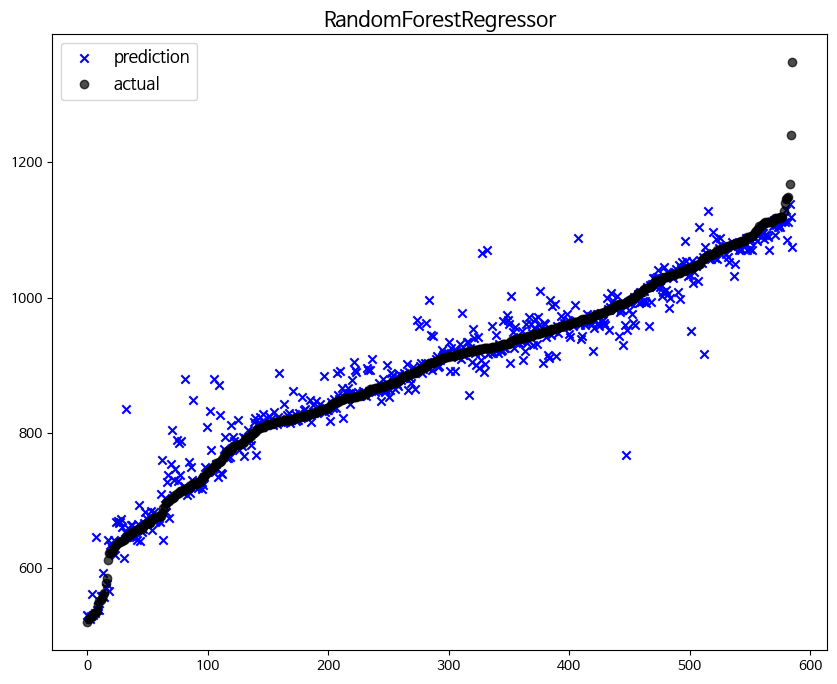

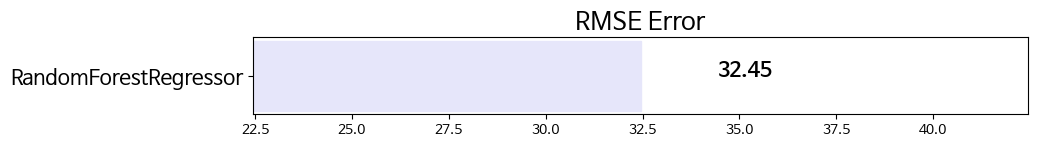


                       Adjusted R_2       rmse                  model
RandomForestRegressor      0.946123  32.450436  RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 기본 모델 생성
rf_base4 = RandomForestRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
rf_base4.fit(X_train, y_train)

# 모델 예측
rf_pred4 = rf_base4.predict(X_test)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor', rf_pred4, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 150, 200],  # 트리 개수
    'max_depth': [None, 10, 20],     # 최대 깊이(None은 제한 없음을 의미)
    'min_samples_split': [2, 3, 4], # 노드 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 3],   # 리프 노드를 위한 최소 샘플 수
    'max_features':[None, 1, 2] # 트리 분할 시 사용할 최대 특성의 수
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

rf_base = RandomForestRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
rf_grid_search = GridSearchCV(rf_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
rf_grid_search.fit(X_train, y_train)

# 최적 모델 저장
rf_best_model4 = rf_grid_search.best_estimator_

print("최적 파라미터 조합:", rf_grid_search.best_params_)

최적 파라미터 조합: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}


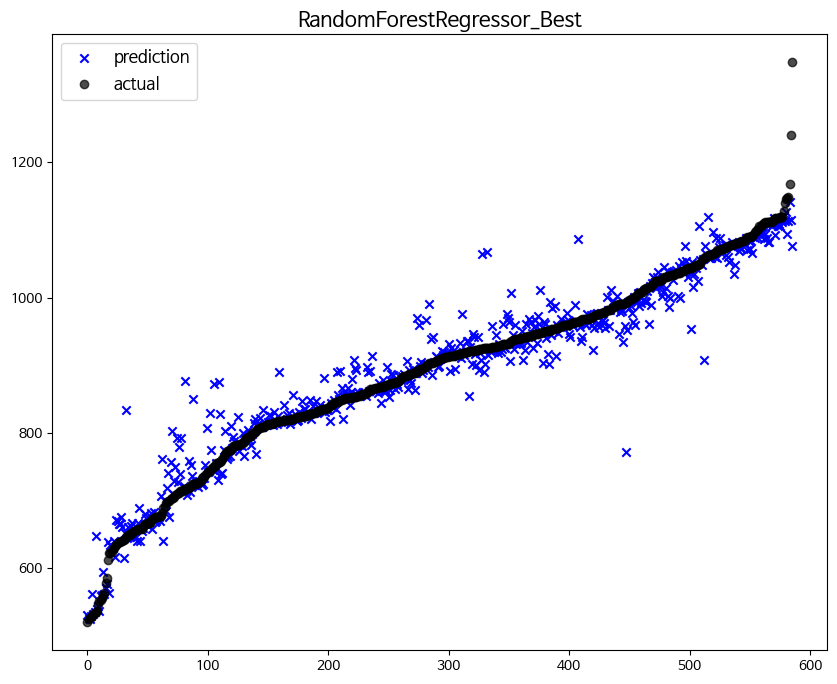

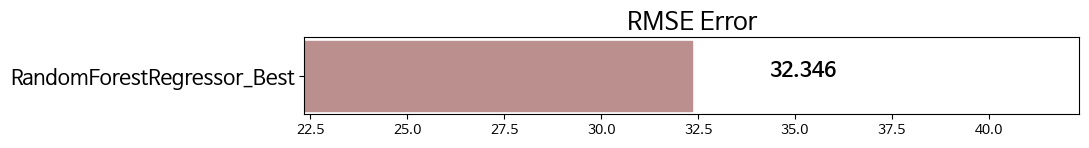


                            Adjusted R_2       rmse  \
RandomForestRegressor_Best      0.946468  32.346389   

                                                 model  
RandomForestRegressor_Best  RandomForestRegressor_Best  


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
rf_best_model4.fit(X_train, y_train)

# 모델 예측
rf_pred4 = rf_best_model4.predict(X_test)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor_Best', rf_pred4, y_test)

### **2) CatBoostRegressor**

#### **a. Base Model**

In [ ]:
# !pip install catboost

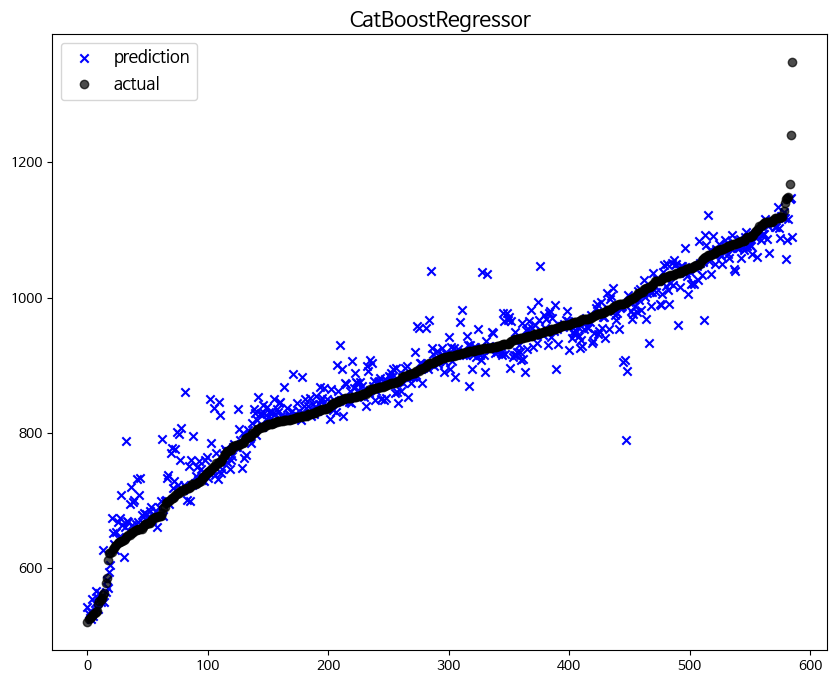

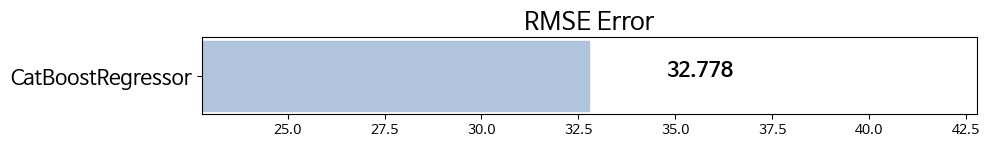


                   Adjusted R_2       rmse              model
CatBoostRegressor       0.94503  32.778134  CatBoostRegressor


In [ ]:
from catboost import CatBoostRegressor

# 기본 모델 생성
catboost_base4 = CatBoostRegressor(random_seed = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
catboost_base4.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred4 = catboost_base4.predict(X_test)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor', catboost_pred4, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'border_count': [200, 254, 300],  # 결정 경계(borders)의 수, 트리 노드 분할에 사용
    'depth': [4, 6, 8],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.5],  # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'iterations': [500, 1000],  # 반복 횟수, 학습 과정에서 사용되는 트리의 수
    'l2_leaf_reg': [1, 3, 5],  # L2 정규화의 강도, 모델의 과적합을 제어
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

catboost_base = CatBoostRegressor(random_seed = 42)

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
catboost_grid_search = GridSearchCV(catboost_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
catboost_grid_search.fit(X_train, y_train, verbose = 0)

# 최적 모델 저장
catboost_best_model4 = catboost_grid_search.best_estimator_

print("최적 파라미터 조합:", catboost_grid_search.best_params_)

최적 파라미터 조합: {'border_count': 254, 'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


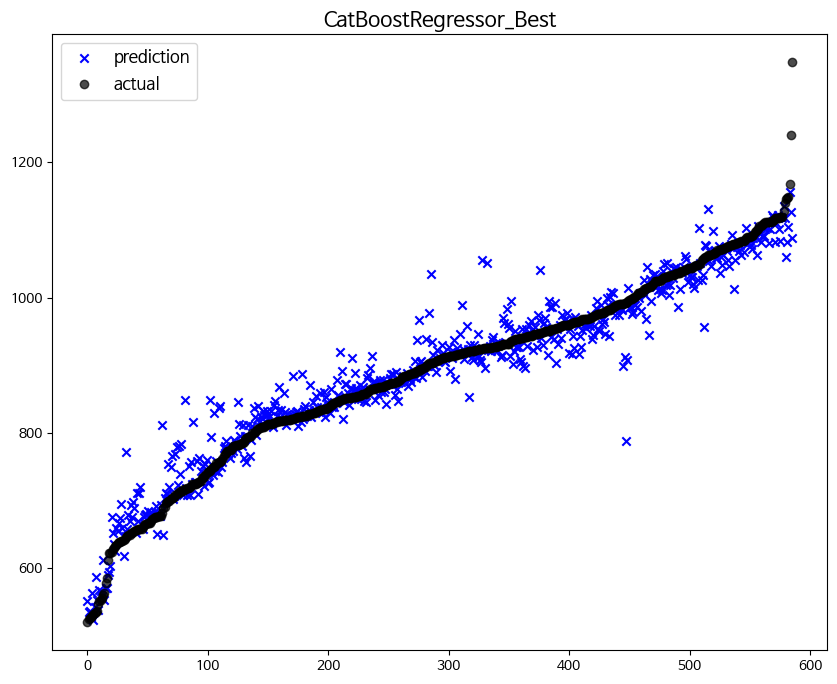

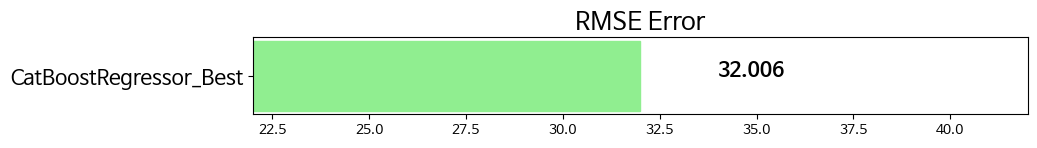


                        Adjusted R_2       rmse                   model
CatBoostRegressor_Best       0.94759  32.005646  CatBoostRegressor_Best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
catboost_best_model4.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred4 = catboost_best_model4.predict(X_test)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor_Best', catboost_pred4, y_test)

### **3) XGBRegressor**

#### **a. Base Model**

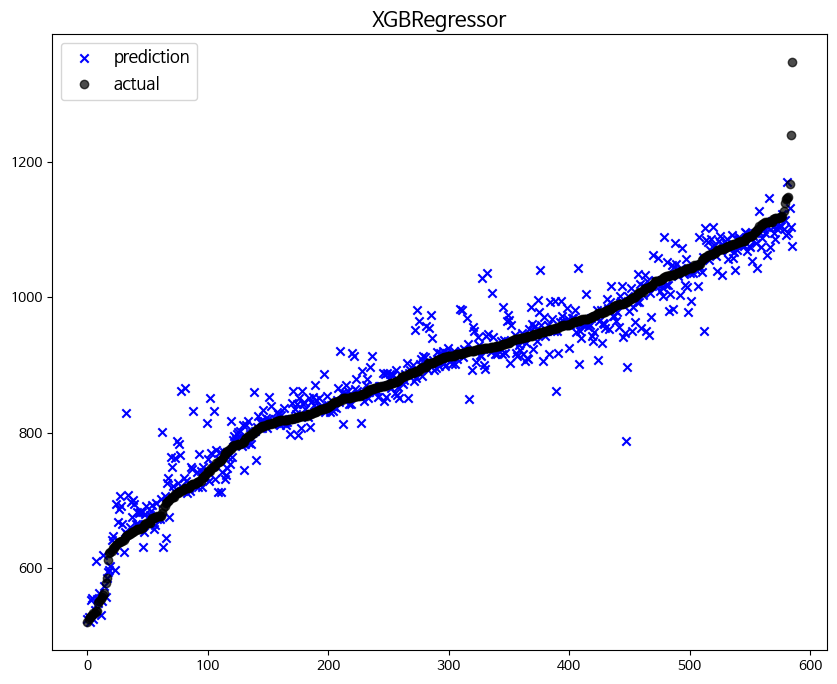

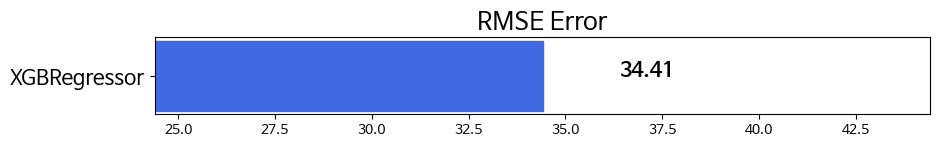


              Adjusted R_2       rmse         model
XGBRegressor       0.93942  34.410047  XGBRegressor


In [ ]:
from xgboost import XGBRegressor

# 기본 모델 생성
xgb_base4 = XGBRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
xgb_base4.fit(X_train, y_train, verbose = 0)

# 모델 예측
xgb_pred4 = xgb_base4.predict(X_test)

# 모델 평가 및 시각화
model_eval('XGBRegressor', xgb_pred4, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2], # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'max_depth': [None, 3, 4], # 트리의 최대 깊이
    'n_estimators': [100, 200, 300], # 트리의 수, 반복 횟수
    'subsample': [None, 0.8, 1.0], # 각 트리를 학습시킬 때 사용할 샘플의 비율
    'colsample_bytree': [None, 0.8, 1.0] # 각 트리를 학습시킬 때 사용할 피처의 비율
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

xgb_base = XGBRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
xgb_grid_search = GridSearchCV(xgb_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
xgb_grid_search.fit(X_train, y_train)

# 최적 모델 저장
xgb_best_model4 = xgb_grid_search.best_estimator_

print("최적 파라미터 조합:", xgb_grid_search.best_params_)

최적 파라미터 조합: {'colsample_bytree': None, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 300, 'subsample': 0.8}


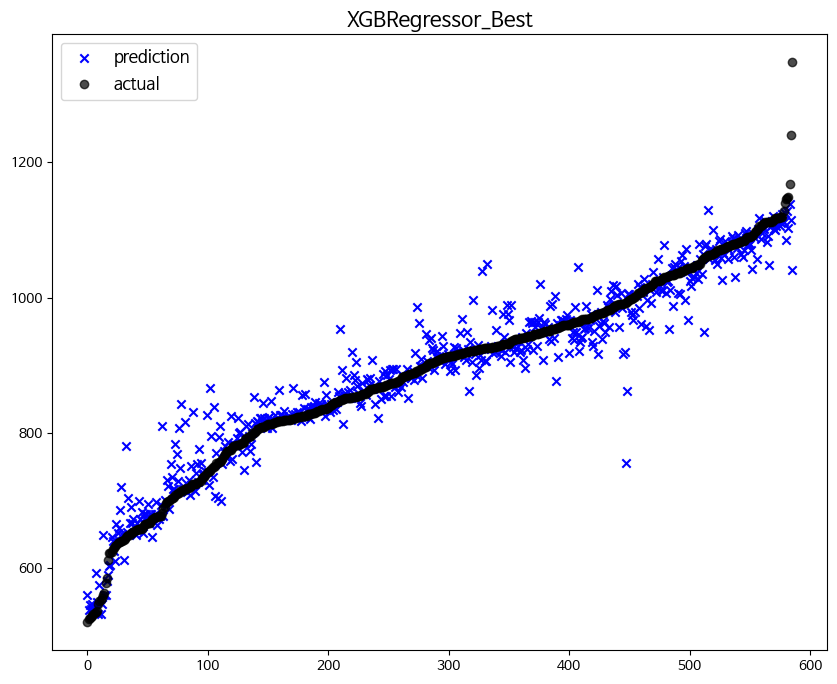

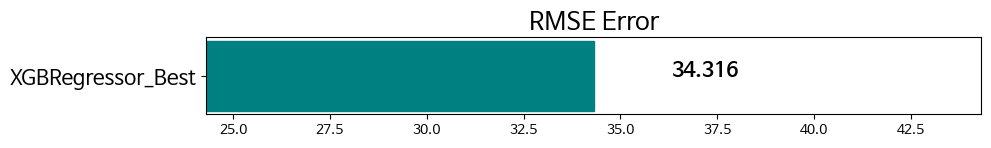


                   Adjusted R_2       rmse              model
XGBRegressor_Best      0.939752  34.315569  XGBRegressor_Best


In [ ]:
### 최적 모델링
# 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
xgb_best_model4.fit(X_train, y_train, verbose = 0)

# 모델 예측
xgb_pred4 = xgb_best_model4.predict(X_test)

# 모델 평가 및 시각화
model_eval('XGBRegressor_Best', xgb_pred4, y_test)

### **4) ExtraTreesRegressor**

#### **a. Base Model**

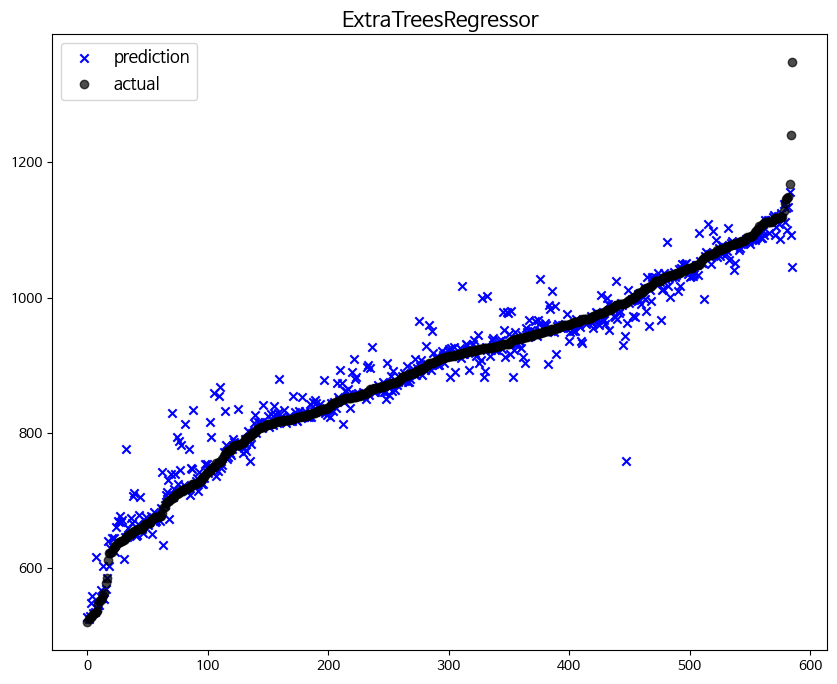

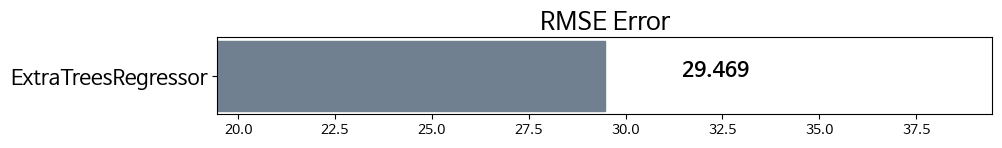


                     Adjusted R_2       rmse                model
ExtraTreesRegressor      0.955568  29.469041  ExtraTreesRegressor


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# 기본 모델 생성
et_base4 = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
et_base4.fit(X_train, y_train)

# 모델 예측
et_pred4 = et_base4.predict(X_test)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor', et_pred4, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],         # 트리의 수, 반복 횟수
    'max_depth': [None, 10, 20],             # 트리의 최대 깊이
    'min_samples_split': [1, 2, 4],         # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],           # 리프 노드에 필요한 최소 샘플 수
    'max_features': ['sqrt', 1] # 노드에서 고려할 최대 피처 수
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

et_base = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
et_grid_search = GridSearchCV(et_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE', verbose = 0)
et_grid_search.fit(X_train, y_train)

# 최적 모델 저장
et_best_model4 = et_grid_search.best_estimator_

print("최적 파라미터 조합:", et_grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

최적 파라미터 조합: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


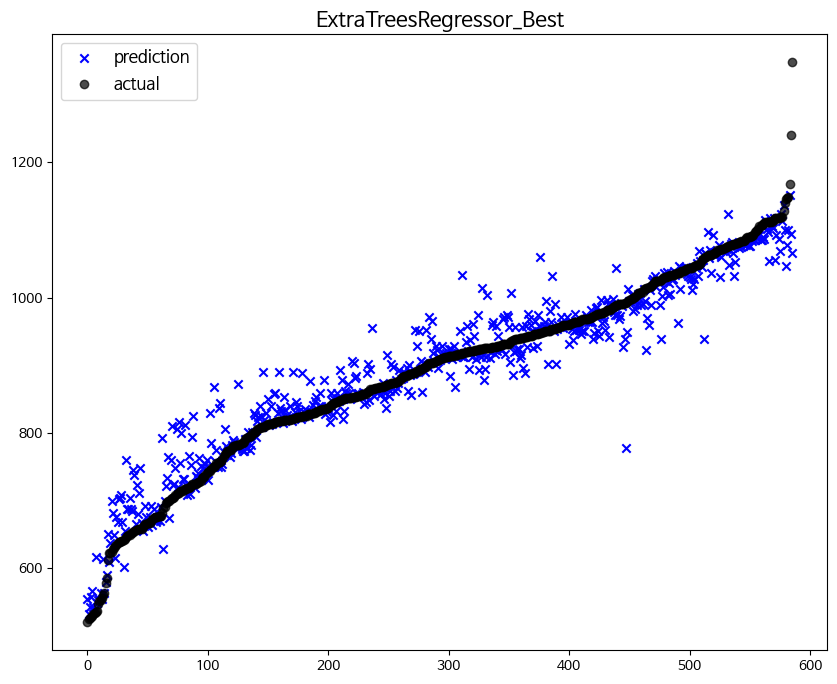

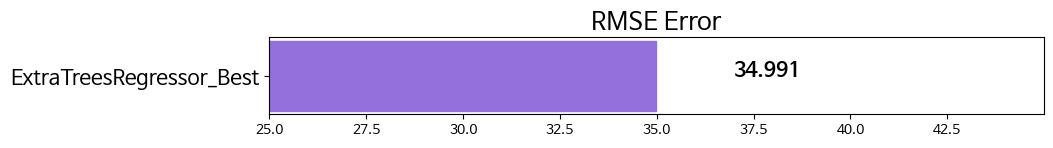


                          Adjusted R_2       rmse                     model
ExtraTreesRegressor_Best      0.937357  34.991074  ExtraTreesRegressor_Best


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
et_best_model4.fit(X_train, y_train)

# 모델 예측
et_pred4 = et_best_model4.predict(X_test)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor_Best', et_pred4, y_test)

- 하이퍼 파라미터 튜닝을 진행하지 않은 **base model**의 성능이 더 좋다.

### **5) LGBMRegressor**

#### **a. Base Model**

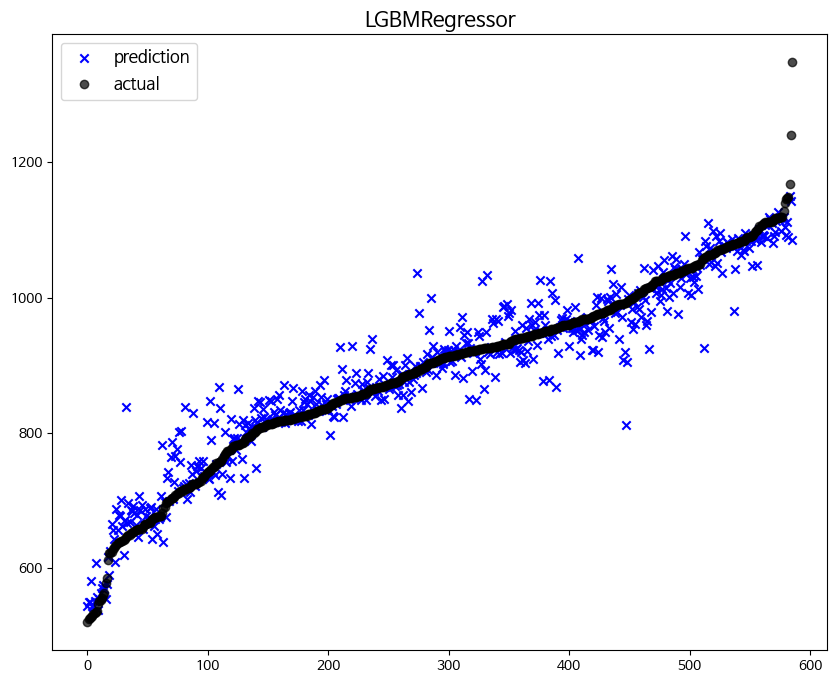

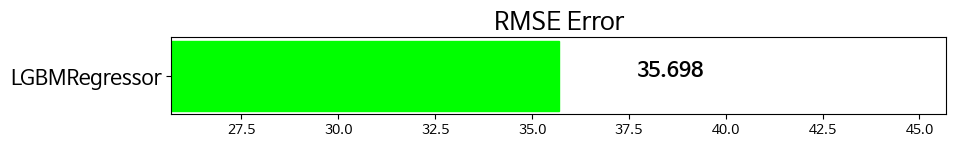


               Adjusted R_2       rmse          model
LGBMRegressor        0.9348  35.698084  LGBMRegressor


In [ ]:
from lightgbm import LGBMRegressor

# 기본 모델 생성
lgbm_base4 = LGBMRegressor(random_state = 42, verbosity=-1)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
lgbm_base4.fit(X_train, y_train)

# 모델 예측
lgbm_pred4 = lgbm_base4.predict(X_test)

# 모델 평가 및 시각화
model_eval('LGBMRegressor', lgbm_pred4, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [100, 300, 500],  # 트리의 개수
    'learning_rate': [0.01, 0.1, 0.5],  # 학습률
    'max_depth': [None, 5, 10],  # 트리의 최대 깊이
    'min_child_samples': [20, 50, 100],  # 각 리프 노드에 필요한 최소 샘플 수
    'subsample': [0.8, 1.0],  # 각 트리에 사용될 데이터 샘플링 비율
    'colsample_bytree': [0.8, 1.0],  # 각 트리에 사용될 피처 샘플링 비율
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

lgbm_base = LGBMRegressor(random_state = 42, verbosity=-1)

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
lgbm_grid_search = GridSearchCV(lgbm_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
lgbm_grid_search.fit(X_train, y_train)

# 최적 모델 저장
lgbm_best_model4 = lgbm_grid_search.best_estimator_

print("최적 파라미터 조합:", lgbm_grid_search.best_params_)

최적 파라미터 조합: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': None, 'min_child_samples': 20, 'n_estimators': 500, 'subsample': 0.8}


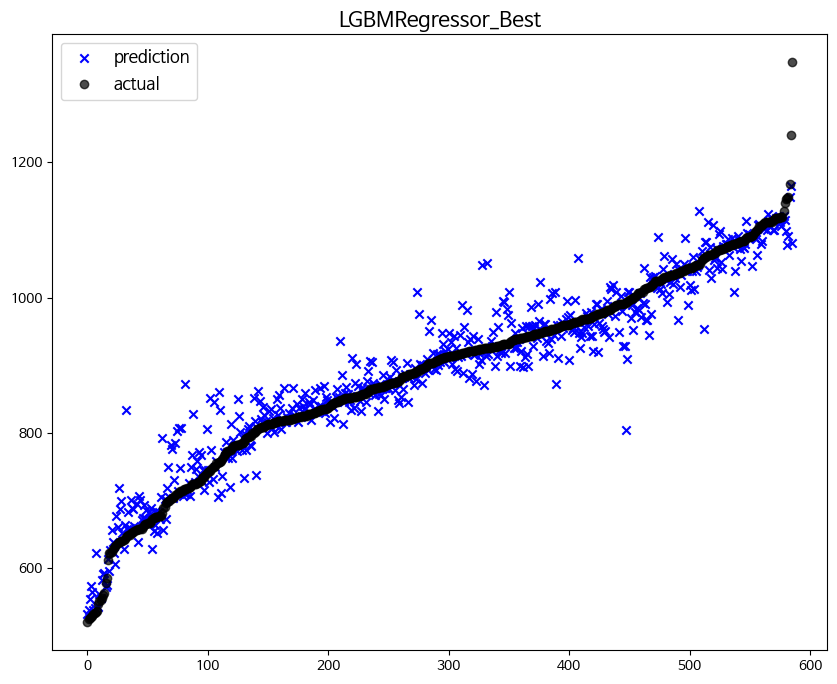

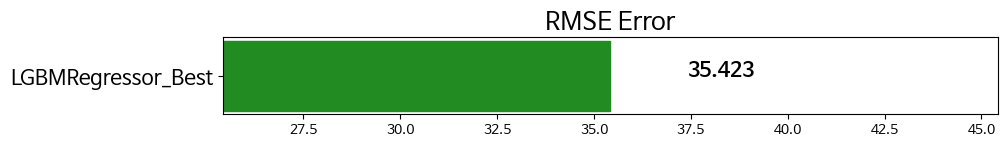


                    Adjusted R_2       rmse               model
LGBMRegressor_Best        0.9358  35.423202  LGBMRegressor_Best


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
lgbm_best_model4.fit(X_train, y_train)

# 모델 예측
lgbm_pred4 = lgbm_best_model4.predict(X_test)

# 모델 평가 및 시각화
model_eval('LGBMRegressor_Best', lgbm_pred4, y_test)

### **⏺ 최적 모델로 예측**

- 모델별 성능 비교

|Model|RMSE|Adj R^2|
|-------|----|----|
|RandomForestRegressor|32.346|0.9465|
|CatBoostRegressor|32.006|0.9476|
|XGBRegressor|34.316|0.9398|
|ExtraTreesRegressor|29.469|0.9556|
|LGBMRegressor|35.423|0.9358|

- rmse와 Adjusted R-Square 측면에서 모두 ExtraTreesRegressor의 성능이 가장 좋음을 확인할 수 있다.

In [ ]:
# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

best_model4 = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

# 모델 학습
best_model4.fit(X_train, y_train)

# 모델 예측
y_pred4 = best_model4.predict(X_test)

In [ ]:
# 예측 성능 확인

rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))
print(f"Group 4 RMSE: {rmse4:.3f}")

Group 4 RMSE: 29.469


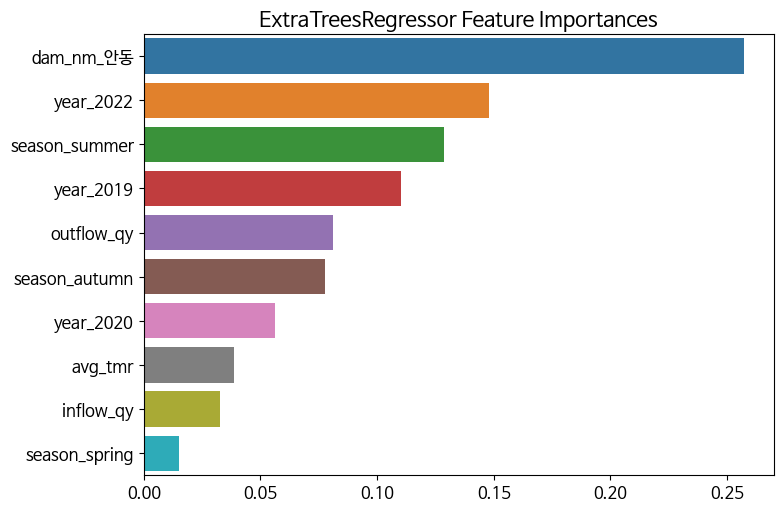

In [ ]:
# 피처 중요도 시각화

visualize_ftr_importances(best_model4)
plt.show()

In [ ]:
# 역변환을 위한 함수

def reverse_one_hot_encoding(row, prefix):
  cols = [col for col in row.index if col.startswith(prefix)] # 범주형 변수
  value = [col.split('_')[-1] for col in cols if row[col] == 1] # 카테고리

  return value[0] if value else None

In [ ]:
# 범주형 변수를 원래대로

X_test['dam_nm'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('dam_nm_',))
X_test['year'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('year',))
X_test['season'] = X_test.apply(reverse_one_hot_encoding, axis = 1, args = ('season',))

### **⏺ 활용 능력 계산**
- 현재 댐에 저장되어 있는 물 중 얼만큼을 사용할 수 있을까?

In [ ]:
# 현재 저수량 예측값을 DataFrame 형태로 저장

df4 = pd.DataFrame(y_pred4, columns = ['reserve_qy_pred'])
df4.head(3)

reserve_qy_pred
0       850.911750
1       839.217210
2       966.077004

In [ ]:
# 필요한 변수와 결합

df4 = pd.concat([X_test[['dam_nm', 'year', 'season']], df4, group4_te[['unused_qy', 'maximum_use_qy']]], axis = 1) # 열 방향 결합
df4.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy
0     대청  2021  summer       850.911750      450.0           790.0
1     대청  2019  summer       839.217210      450.0           790.0
2     대청  2022  autumn       966.077004      450.0           790.0

In [ ]:
# 활용 용량 계산
def calculate_usable_qy(data):
    usable_qy = data['reserve_qy_pred'] - data['unused_qy']
    return min(usable_qy, data['maximum_use_qy']) # (최대) 이수용량을 초과하여 댐의 물을 이용할 수는 없음(관련 기관의 승인 필요)

df4['usable_qy'] = df4.apply(calculate_usable_qy, axis = 1)

In [ ]:
df4.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy   usable_qy
0     대청  2021  summer       850.911750      450.0           790.0  400.911750
1     대청  2019  summer       839.217210      450.0           790.0  389.217210
2     대청  2022  autumn       966.077004      450.0           790.0  516.077004

In [ ]:
# 활용 능력 계산
# (최대) 이수용량과 비교하였을 때 얼만큼의 물을 활용할 수 있는가

df4['efficiency'] = df4['usable_qy'] / df4['maximum_use_qy']
df4.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy  \
0     대청  2021  summer       850.911750      450.0           790.0   
1     대청  2019  summer       839.217210      450.0           790.0   
2     대청  2022  autumn       966.077004      450.0           790.0   

    usable_qy  efficiency  
0  400.911750    0.507483  
1  389.217210    0.492680  
2  516.077004    0.653262

In [ ]:
df4.groupby('dam_nm')['efficiency'].describe()

count      mean       std       min       25%       50%       75%  \
dam_nm                                                                      
대청      293.0  0.649794  0.129255  0.323490  0.572323  0.654065  0.751955   
안동      293.0  0.575767  0.129204  0.277863  0.492201  0.579606  0.678010   

             max  
dam_nm            
대청      0.893522  
안동      0.831910

# **5. 결과 해석**

## **5-1. 데이터 결합**
- 댐별로 계산된 활용 능력 데이터를 결합

In [ ]:
# 그룹 변수 추가

df1['group'] = 1
df2['group'] = 2
df3['group'] = 3
df4['group'] = 4

In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index = True)
df.head(3)

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy  usable_qy  \
0     군위  2021  summer        26.463792        5.5            40.1  20.963792   
1     군위  2019  summer        18.438003        5.5            40.1  12.938003   
2     군위  2022  autumn        14.689891        5.5            40.1   9.189891   

   efficiency  group  
0    0.522788      1  
1    0.322643      1  
2    0.229174      1

## **5-2. 수질 데이터 결합**
- 댐별, 연도별, 계절별 등급의 최빈값 산정 후 원본 데이터에 결합

### **a) 데이터 불러오기**

In [ ]:
quality = pd.read_csv('/content/drive/MyDrive/2023년 K-water 대국민 물 빅데이터 분석과제 공모전/final/quality.csv', sep = ',')
quality.head(3)

dam_nm  year  month   pH  TOC   SS    DO      TP  Chl-a  tot_coli  fec_coli  \
0     군위  2019      1  6.8  4.1  1.1  10.8  0.0120    2.1       5.0       0.0   
1     군위  2019      2  7.6  4.0  1.0  12.1  0.0105    3.4       1.0       0.0   
2     군위  2019      3  7.3  3.9  1.7  13.5  0.0075    1.5       2.0       1.0   

  grade  
0   III  
1    II  
2    II

In [ ]:
# 계절 계산하기

def get_season(x):
  if x in [3, 4, 5]:
    return 'spring'
  elif x in [6, 7, 8]:
    return 'summer'
  elif x in [9, 10, 11]:
    return 'autumn'
  else:
    return 'winter'

In [ ]:
quality['season'] = quality['month'].apply(get_season)
quality.head(3)

dam_nm  year  month   pH  TOC   SS    DO      TP  Chl-a  tot_coli  fec_coli  \
0     군위  2019      1  6.8  4.1  1.1  10.8  0.0120    2.1       5.0       0.0   
1     군위  2019      2  7.6  4.0  1.0  12.1  0.0105    3.4       1.0       0.0   
2     군위  2019      3  7.3  3.9  1.7  13.5  0.0075    1.5       2.0       1.0   

  grade  season  
0   III  winter  
1    II  winter  
2    II  spring

In [ ]:
quality.drop('month',axis = 1, inplace = True) # 월은 더 이상 필요 없으므로 삭제

In [ ]:
# 댐별, 계절별 최빈값 계산
quality_df = quality.groupby(['dam_nm','year', 'season'])['grade'].apply(lambda x: x.mode()[0]).reset_index()
quality_df

dam_nm  year  season grade
0       군위  2019  autumn   III
1       군위  2019  spring    II
2       군위  2019  summer    II
3       군위  2019  winter    II
4       군위  2020  autumn   III
..     ...   ...     ...   ...
331     횡성  2021  winter    Vl
332     횡성  2022  autumn    II
333     횡성  2022  spring    Ib
334     횡성  2022  summer   III
335     횡성  2022  winter    Vl

[336 rows x 4 columns]

### **b) 데이터 결합**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6153 entries, 0 to 6152
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dam_nm           6153 non-null   object 
 1   year             6153 non-null   object 
 2   season           6153 non-null   object 
 3   reserve_qy_pred  6153 non-null   float64
 4   unused_qy        6153 non-null   float64
 5   maximum_use_qy   6153 non-null   float64
 6   usable_qy        6153 non-null   float64
 7   efficiency       6153 non-null   float64
 8   group            6153 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 432.8+ KB


In [ ]:
quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dam_nm  336 non-null    object
 1   year    336 non-null    int64 
 2   season  336 non-null    object
 3   grade   336 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.6+ KB


In [ ]:
## 두 데이터에서 year 변수의 데이터형이 다름
# df의 year를 숫자형으로 변경

df['year'] = df['year'].astype('int64')

In [ ]:
df = pd.merge(df, quality_df, on = ['dam_nm', 'year', 'season'], how = 'inner')
df

dam_nm  year  season  reserve_qy_pred  unused_qy  maximum_use_qy  \
0        군위  2021  summer        26.463792        5.5            40.1   
1        군위  2021  summer        28.600610        5.5            40.1   
2        군위  2021  summer        30.558230        5.5            40.1   
3        군위  2021  summer        25.703650        5.5            40.1   
4        군위  2021  summer        24.274196        5.5            40.1   
...     ...   ...     ...              ...        ...             ...   
6148     안동  2021  spring       925.635230      248.0          1000.0   
6149     안동  2021  spring       929.310250      248.0          1000.0   
6150     안동  2021  spring       932.368940      248.0          1000.0   
6151     안동  2021  spring       876.692330      248.0          1000.0   
6152     안동  2021  spring       927.439830      248.0          1000.0   

       usable_qy  efficiency  group grade  
0      20.963792    0.522788      1    II  
1      23.100610    0.576075      1    II  
2      25.058230    0.624894      1    II  
3      20.203650    0.503832      1    II  
4      18.774196    0.468184      1    II  
...          ...         ...    ...   ...  
6148  677.635230    0.677635      4    II  
6149  681.310250    0.681310      4    II  
6150  684.368940    0.684369      4    II  
6151  628.692330    0.628692      4    II  
6152  679.439830    0.679440      4    II  

[6153 rows x 10 columns]

In [ ]:
df.groupby(['group', 'dam_nm'])['efficiency'].describe()

count      mean       std       min       25%       50%  \
group dam_nm                                                            
1     군위      293.0  0.446600  0.162053  0.114030  0.348418  0.451895   
      김천부항    293.0  0.621367  0.188613  0.228754  0.481393  0.609845   
      남강      293.0  0.488868  0.144753  0.234640  0.408114  0.497194   
      밀양      293.0  0.713203  0.124895  0.386239  0.650700  0.717727   
      보령      293.0  0.376890  0.132206  0.163893  0.269402  0.361081   
      보현산     293.0  0.486918  0.178103  0.170089  0.368921  0.459664   
      부안      293.0  0.849538  0.102650  0.523864  0.776342  0.874833   
      성덕      293.0  0.608901  0.129304  0.320388  0.535373  0.606758   
      영주      293.0  0.324815  0.226442  0.000000  0.153350  0.353009   
      장흥      293.0  0.582080  0.131440  0.339627  0.474876  0.552353   
      주암(조)   293.0  0.653650  0.198795  0.141445  0.596745  0.715983   
      횡성      293.0  0.621512  0.133885  0.203489  0.542371  0.636613   
2     소양강     293.0  0.552270  0.115761  0.241336  0.468329  0.537147   
      충주      293.0  0.507061  0.160001  0.151792  0.388524  0.537072   
3     섬진강     293.0  0.562565  0.166131  0.176858  0.446200  0.630252   
      용담      293.0  0.717878  0.157881  0.434020  0.571730  0.737616   
      임하      293.0  0.432059  0.179222  0.077387  0.280743  0.452337   
      주암(본)   293.0  0.575383  0.194089  0.193145  0.421652  0.607561   
      합천      293.0  0.602553  0.263375  0.154918  0.371174  0.680819   
4     대청      293.0  0.649794  0.129255  0.323490  0.572323  0.654065   
      안동      293.0  0.575767  0.129204  0.277863  0.492201  0.579606   

                   75%       max  
group dam_nm                      
1     군위      0.544625  0.938685  
      김천부항    0.797527  1.000000  
      남강      0.533953  1.000000  
      밀양      0.803618  0.977815  
      보령      0.455011  0.711051  
      보현산     0.571731  1.000000  
      부안      0.916899  1.000000  
      성덕      0.706629  0.917133  
      영주      0.505062  0.860550  
      장흥      0.690349  0.916459  
      주암(조)   0.792486  0.897999  
      횡성      0.740392  0.800374  
2     소양강     0.626914  0.833481  
      충주      0.638678  0.838919  
3     섬진강     0.683327  0.848928  
      용담      0.824716  1.000000  
      임하      0.583965  0.833714  
      주암(본)   0.740797  0.936573  
      합천      0.817757  1.000000  
4     대청      0.751955  0.893522  
      안동      0.678010  0.831910

In [ ]:
df.groupby(['group', 'dam_nm'])['grade'].describe()

count unique  top freq
group dam_nm                       
1     군위       293      2   II  244
      김천부항     293      4   Ib  107
      남강       293      4   Ib  131
      밀양       293      4   Ib  198
      보령       293      3   Ib  203
      보현산      293      5  III  141
      부안       293      2   Ib  237
      성덕       293      6   Ib  107
      영주       293      5   IV  110
      장흥       293      3   Ib  169
      주암(조)    293      2   Ib  242
      횡성       293      4   Ib  204
2     소양강      293      6   Ib  141
      충주       293      2   Ib  183
3     섬진강      293      2   Ib  226
      용담       293      4   Ib  123
      임하       293      3   II  147
      주암(본)    293      2   Ib  275
      합천       293      2   Ib  278
4     대청       293      2   Ib  182
      안동       293      3   Ib  204